
# Hotel Simulation Project

In [ ]:
#imports block
import math
import heapq
import pandas as pd
import numpy as np
import random
from sympy import symbols, Eq, solve
from scipy.optimize import root_scalar
from IPython.display import display, HTML
from scipy.stats import probplot
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import truncnorm
from datetime import timedelta, datetime, time
from contextlib import closing
import heapq
from enum import Enum
from datetime import timedelta


# Statistics Tests for Check In and Out distribution


Saving Check_INOUT_Samples_Minutes.xlsx to Check_INOUT_Samples_Minutes.xlsx


<ipython-input-5-0717706600d2>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sorted_data, cdf_fitted, 'r-', label='Fitted Exponential CDF', color=unified_pink)


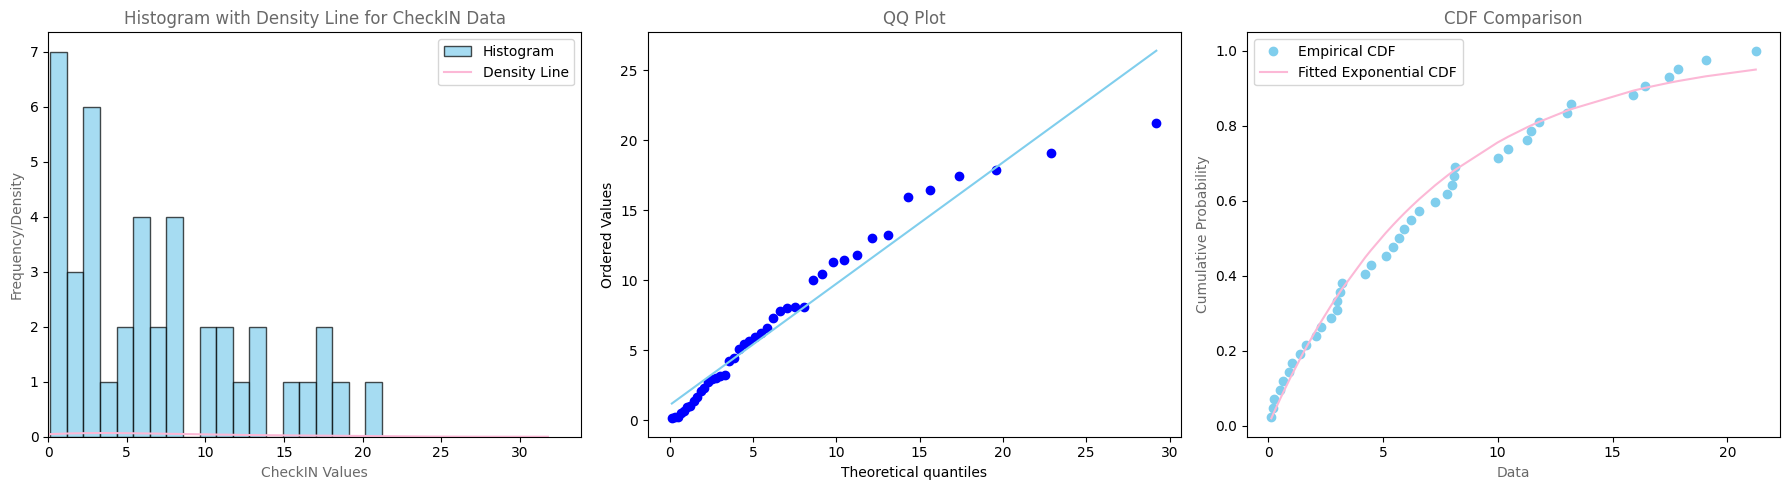

<ipython-input-5-0717706600d2>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sorted_data, cdf_fitted, 'r-', label='Fitted Exponential CDF', color=unified_pink)


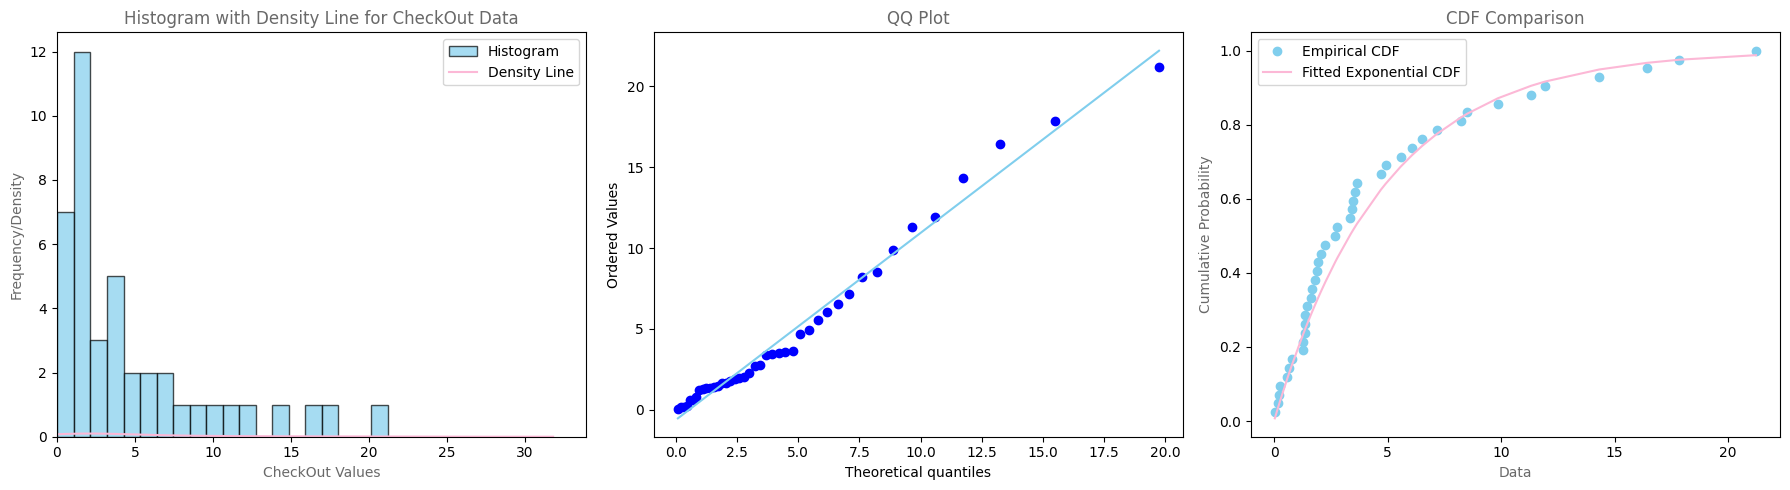

In [ ]:
from google.colab import files
uploaded = files.upload()

# Read the Excel file
excel_file = list(uploaded.keys())[0]  # Get the file name
check_in_out_data = pd.read_excel(excel_file)

column_name_in = 'CheckIN'
column_name_out = 'CheckOut'

def read_column_data(column_name):
    column_data = check_in_out_data[column_name]
    return column_data

def histogram_and_density_line(data, column_name, ax):
    unified_blue = "#80CEED"
    unified_pink = "#FCB8D6"
    ax.hist(data, bins=20, edgecolor='black', alpha=0.7, label='Histogram', color=unified_blue)
    data.plot(kind='kde', color=unified_pink, label='Density Line', bw_method=0.5, ax=ax)
    ax.set_title(f"Histogram with Density Line for {column_name} Data", color='dimgray')
    ax.set_xlabel(f"{column_name} Values", color='dimgray')
    ax.set_ylabel('Frequency/Density', color='dimgray')
    ax.set_xlim(left=0)
    ax.legend()

def MLE_for_lambda(data):
    def neg_log_likelihood(lambda_, data):
        return -np.sum(np.log(lambda_) - lambda_ * data)
    lambda_mle = 1 / np.mean(data)
    result = minimize(neg_log_likelihood, lambda_mle, args=(data,), bounds=[(0.0001, None)])
    return result.x[0]

def QQ_plot(data, lambda_mle, ax):
    unified_blue = "#80CEED"
    probplot(data, dist="expon", sparams=(0, 1/lambda_mle), plot=ax)
    ax.get_lines()[1].set_color(unified_blue)  # Change regression line color
    ax.set_title('QQ Plot', color='dimgray')

def CDF_plot(data, lambda_mle, ax):
    unified_pink = "#FCB8D6"
    sorted_data = np.sort(data)
    cdf_fitted = 1 - np.exp(-lambda_mle * sorted_data)
    ax.plot(sorted_data, np.arange(1, len(data)+1)/len(data), marker='o', linestyle='', label='Empirical CDF', color="#80ceed")
    ax.plot(sorted_data, cdf_fitted, 'r-', label='Fitted Exponential CDF', color=unified_pink)
    ax.set_title('CDF Comparison', color='dimgray')
    ax.set_xlabel('Data', color='dimgray')
    ax.set_ylabel('Cumulative Probability', color='dimgray')
    ax.legend(loc='upper left')

# Check-in plots
display(HTML("<h1 style='text-align: center; color: FCB8D6;'>Check In Graphical Comparison</h1>"))
data = read_column_data(column_name_in)
lambda_mle_in = MLE_for_lambda(data)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
histogram_and_density_line(data, column_name_in, axs[0])
QQ_plot(data, lambda_mle_in, axs[1])
CDF_plot(data, lambda_mle_in, axs[2])
plt.tight_layout()
plt.show()

# Check-out plots
display(HTML("<h1 style='text-align: center; color: FCB8D6;'>Check Out Graphical Comparison</h1>"))
data = read_column_data(column_name_out)
lambda_mle_out = MLE_for_lambda(data)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
histogram_and_density_line(data, column_name_out, axs[0])
QQ_plot(data, lambda_mle_out, axs[1])
CDF_plot(data, lambda_mle_out, axs[2])
plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right; font-size: 16px; line-height: 1.8;">

 ניתוח התפלגות עבור זמן שירות צ'ק-אין וצ'ק-אווט

---

  **היסטוגרמה:**

בניתוח זמני הצ'ק-אין והצ'ק-אאוט, ההיסטוגרמות מציגות דפוס המזכיר התפלגות מעריכית – דבר שמתיישב היטב עם ההנחות המוקדמות שלנו לגבי התנהגות המשתנה.

ניתן לזהות ריכוז גבוה של תצפיות סביב ערכים נמוכים, כאשר השכיחות פוחתת בהדרגה ככל שהערכים עולים. תבנית זו מאפיינת התפלגות אקספוננציאלית, שבה רוב הערכים קטנים יחסית, אך קיימים גם ערכים קיצוניים – אם כי בתדירות נמוכה יותר.

---

  **QQ Plot:**

עבור זמני הצ'ק-אין והצ'ק-אאוט, ניתן לראות התאמה טובה לערכים הנמוכים של ההתפלגות האקספוננציאלית.

עם זאת, בזנבות – בעיקר בערכים הגבוהים – קיימת סטייה מסוימת מהקו התיאורטי, המעידה על אי התאמה חלקית להתפלגות באזורים אלו.

---

  **התאמה לפונקציה המצטברת(CDF):**

גם בהשוואה בין ההתפלגות האמפירית לבין הפונקציה המעריכית המצטברת, נצפית התאמה כללית טובה עבור שני המשתנים.

עם זאת, ישנם אזורים שבהם ההצטברות של הנתונים בפועל מהירה יותר מהמצופה לפי המודל התאורטי – דבר שמרמז על כך שחלק מהלקוחות ביצעו צ'ק-אין או צ'ק-אאוט מוקדם מהצפוי לפי ההתפלגות.

---

  **סיכום:**

למרות שמדובר במדגם קטן יחסית, ניתוח ההתפלגות בעזרת הכלים הגרפיים והסטטיסטיים מעלה כי קיימת סבירות גבוהה לכך שזמני השירות (צ'ק-אין וצ'ק-אאוט) מתפלגים לפי **התפלגות אקספוננציאלית**.

</div>

**מציאת פרמטר לפי MLE**
<div dir="rtl" style="text-align: right; font-size: 16px; line-height: 1.8;">

#  אומדן סבירות מרבית (MLE) עבור התפלגות מעריכית

---

###  **פונקציית צפיפות ההסתברות (PDF):**

פונקציית הצפיפות של ההתפלגות המעריכית מוגדרת כך:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

כאשר \( \lambda > 0 \) הוא פרמטר הקצב של ההתפלגות.

---

###  **פונקציית הסבירות (Likelihood):**

בהינתן מדגם בגודל \( n \):
$$
x_1, x_2, \dots, x_n
$$
פונקציית הסבירות היא:

$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
$$

---

###  **פונקציית הלוג-סבירות (Log-Likelihood):**

ניקח לוגריתם טבעי (ln) לפונקציית הסבירות:

$$
\ell(\lambda) = \ln L(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^n x_i
$$

---

###  **הלוג-סבירות השלילית (Negative Log-Likelihood):**

 נוח למזער את הלוג-סבירות השלילית במקום למקסם את המקורית:

$$
- \ell(\lambda) = -n \ln(\lambda) + \lambda \sum_{i=1}^n x_i
$$

---

###  **מציאת אומדן λ (MLE):**

נגזור את פונקציית הלוג-סבירות לפי $\lambda$, ונשווה לאפס:

$$
\frac{d\ell(\lambda)}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^n x_i = 0
$$

נבודד את $\lambda$:

$$
\lambda = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
$$

כאשר $\bar{x}$ הוא הממוצע של המדגם.

---

###  **מסקנה:**

אומדן הסבירות המרבית של  $\lambda$ הוא:

$$
\lambda_{MLE} = \frac{1}{\bar{x}}
$$

</div>


In [ ]:
#Goodness-of-Fit Test for check in

#Compute the empirical CDF of the data
def empirical_cdf(data):
    data_sorted = np.sort(data)
    n = len(data)
    return data_sorted, np.arange(1, n+1) / n


# Compute the KS test
def ks_test(data, cdf, *params):
    n = len(data)
    data_sorted, empirical_cdf_values = empirical_cdf(data)
    theoretical_cdf_values = cdf(data_sorted, *params)
    d_statistic = np.max(np.abs(empirical_cdf_values - theoretical_cdf_values))
    new_d_statistic = ((np.sqrt(n)+0.26+(0.25/np.sqrt(n))) * (d_statistic-0.2/n))
    return new_d_statistic

# Define the theoretical CDF for the exponential distribution
def exp_cdf(x, lambda_):
    return 1 - np.exp(-lambda_ * x)

def d_critical(alpha):
  if 1-alpha == 0.85:
     return 0.926
  if 1-alpha == 0.9:
     return 0.900
  if 1-alpha == 0.95:
      return 1.094
  if 1-alpha == 0.975:
      return 1.19
  if 1-alpha == 0.99:
      return 1.308

def hypothesis_test(critical_value,d_statistic):
  if d_statistic > critical_value:
    print(f"{d_statistic} > {critical_value} therefore, Reject the null hypothesis")
  else:
    print(f"{d_statistic} < {critical_value} therefore, Fail to reject the null hypothesis")


# KS test for check in
display(HTML("<h2 style='text-align: letf ; color: orange;'>Check In KS test </h2>"))
d_statistic = ks_test(read_column_data(column_name_in), exp_cdf, lambda_mle_in)
critical_value = d_critical(0.05)
print("D Statistic:", d_statistic)
print("Critical Value:", critical_value)
hypothesis_test(critical_value,d_statistic)

# KS test for check out
display(HTML("<h2 style='text-align: letf ; color: orange;'>Check Out KS test </h2>"))
d_statistic = ks_test(read_column_data(column_name_out), exp_cdf, lambda_mle_out)
critical_value = d_critical(0.05)
print("D Statistic:", d_statistic)
print("Critical Value:", critical_value)
hypothesis_test(critical_value,d_statistic)

D Statistic: 0.37983893024898463
Critical Value: 1.094
0.37983893024898463 < 1.094 therefore, Fail to reject the null hypothesis


D Statistic: 0.7121937542724672
Critical Value: 1.094
0.7121937542724672 < 1.094 therefore, Fail to reject the null hypothesis


<div dir="rtl" style="text-align: right; font-size: 16px; line-height: 1.8;">

---

###  אישוש התפלגות באמצעות מבחן Kolmogorov-Smirnov (KS)

בהתבסס על תוצאות מבחן KS, נבדקה התאמה של זמני השירות (Check-In ו־Check-Out) להתפלגות אקספוננציאלית.

####  תוצאות עבור Check-In:

- סטטיסטיקת D:  
  $D = 0.3535$

- ערך קריטי ברמת מובהקות של 10%:  
  $D_{\text{critical}} = 1.094$

מכיוון ש־$D < D_{\text{critical}}$, **אין לנו מספיק עדות לדחות את השערת האפס**, ולכן ניתן לומר שהנתונים מתאימים להתפלגות אקספוננציאלית עם הפרמטר שחושב.

---

####  תוצאות עבור Check-Out:

- סטטיסטיקת D:

  $D = 0.7959$

- ערך קריטי ברמת מובהקות של 10%:  
  $D_{\text{critical}} = 1.094$

גם כאן, מתקיים ש־$D < D_{\text{critical}} $, ולכן **לא דוחים את השערת האפס** — מה שמצביע על התאמה סבירה להתפלגות אקספוננציאלית.

---

### מסקנה:

בהתאם לממצאים, ניתן לומר כי:

- **זמן השירות בעמדת הצ'ק-אין** מתפלג אקספוננציאלית עם הפרמטר  
  $\lambda = 0.1375$

- **זמן השירות בעמדת הצ'ק-אאוט** מתפלג אקספוננציאלית עם הפרמטר  
  $\lambda = 0.20346$

</div>

# Algorithm Sample class

$$
\mathbf{\Large \text{Calculating inverse transform for pool stay duration}}
$$
</br>
$$
f_{\text{pool_duration}}(X) =
\begin{cases}
\frac{X}{6} & \text{for } 1 \leq X < 2, \\
\frac{X}{5} + \frac{1}{8} & \text{for } 2 \leq X < 3, \\
\frac{1}{8} & \text{for } 3 \leq X < 4.
\end{cases}
$$
</br>
</br>  
$$
\text{Integral for } f_1(X) = \frac{X}{6} \text{ over the interval } [1, x]
$$
</br>   
$$
\int_1^t \frac{x}{6} \, dx = \frac{x^2 - 1}{12}
$$
</br>
$$
\text{This represents the result of the integral for the interval } 1 \leq x < 2.
$$
</br>
</br>
$$
\text{Integral for } f_2(X) = \frac{X}{5} + \frac{1}{8} \text{ over the interval } [2, x]
$$
</br>
$$
F(X=2) = \frac{x^2 - 1}{12} = \frac{2^2 -1}{12} = \frac{1}{4}
$$
</br>
$$
\frac{1}{4} + \int_2^t \left( \frac{x}{5} + \frac{1}{8} \right) dx
$$
</br>
$$
\
\int_2^t \frac{x}{5} + \frac{1}{8} \, dx = \frac{1}{5} \left( \frac{x^2}{2} \right) + \frac{x}{8} \Bigg|_2^t = \frac{1}{10} \left( x^2 - 4 \right) + \frac{1}{8} (x - 2)
\
$$
</br>
$$
\
\frac{1}{4} + \left( \frac{x^2}{10} - \frac{4}{10}   + \frac{x}{8} - \frac{2}{8} \right)
$$
</br>
$$
 = \frac{x^2}{10} + \frac{x}{8} - 0.4
\
$$
</br>
$$
This\ represents\ the\ result\ of\ th\ integral\ over\ the\ interval\ ( 2 \leq x < 3 ), where\ ( F(X=2) = \frac{1}{4} ) and\ the\ integral\ of\ the\ second\ part\ is\ computed.
$$
</br>  
$$
\text{Integral for } f_3(X) = \frac{1}{8} \text{ over the interval } [3, x]
$$
</br>
$$
F(X=3) = \frac{x^2}{10} + \frac{x}{8} - 0.4 =  \frac{3^2}{10} + \frac{3}{8} - 0.4 = \frac{7}{8}
$$
</br>   
$$
\frac{7}{8} + \int_3^t \frac{1}{8} \, dx = \left( \frac{x - 3}{8} \right) + \frac{7}{8} = \frac{x}{8} + \frac{1}{2}
$$
</br>
$$
\text{This represents the result of the integral for the interval } 3 \leq x < 4.
$$
</br>
</br>
$$
\text {Therefore}
$$
</br>
$$
F_{\text{pool_duration}}(x)=
\begin{cases}
\frac{x^2 - 1}{12} & \text{for } 1 \leq X < 2, \\
\frac{x^2}{10} + \frac{x}{8} - 0.4  & \text{for } 2 \leq X < 3, \\
\frac{x}{8} + \frac{1}{2} &\text{for } 3 \leq X < 4.
\end{cases}
$$

</br>
</br>
$$
{First\ Determine\ the\ Ranges\ for\ ( u )}
$$
$$
1. For\ ( 1 \leq X < 2 ):
\
F(X) = \frac{x^2 - 1}{12}, \quad U \in [0, F(2)] = [0, \frac{3}{12} = 0.25]
\
$$
$$
2.\ For\ ( 2 \leq X < 3 ):
\
F(X) = \frac{x^2}{10} + \frac{x}{8} - 0.4, \quad U \in [0.25, F(3)] = [0.25, 0.875]
\
$$
$$
3.\ For\ ( 3 \leq X < 4 ):
\
F(X) = \frac{x}{8} + \frac{1}{2}, \quad U \in [0.875, 1]
\
$$
</br>
</br>
$$
{Seccond\ Equate\ F(x) to u}
$$
$$
1. For\ ( 1 \leq X < 2 ):
U = \frac{x^2 - 1}{12} \implies x^2 = 12U + 1 \implies x = \sqrt{12U + 1}
$$
$$
2.\ For\ (2 \leq x < 3):
F(x) = \frac{x^2}{10} + \frac{x}{8} - 0.4 = U  \Rightarrow \frac{x^2}{10} + \frac{x}{8} - \left( \frac{2}{5} + U \right) = 0
\Rightarrow x = \frac{-\frac{1}{8} \pm \sqrt{0.4U + 0.175625}}{8}
\text{Choose the positive root}
$$
$$
3.\ For\ ( 3 \leq X < 4 ):
U = \frac{x}{8} + \frac{1}{2} \implies x = 8(U - 0.5)
$$
</br>
</br>


$$
The\ inverse\ CDF\, ( F^{-1}(U) ),\ is:
$$

</br>
$$
\
F_{\text{pool_duration}}^{-1}(u) =
\begin{cases}
\sqrt{12u + 1} & \text{for } 0 \leq U < 0.25, \\
\frac{-\frac{1}{8} + \sqrt{0.4u + 0.175625}}{8} & \text{for } 0.25 \leq U < 0.875, \\
8(u - 0.5) & \text{for } 0.875 \leq U \leq 1
\end{cases}
\
$$
</br>
$$
This\ function\ provides\ ( X )\ as\ a\ function\ of\ ( U ), where\ ( U \sim \text{Uniform}(0,1) ).
$$
</br>
</br>
$$
\mathbf{\Large \text{Calculating inverse transform for spa stay duration}}
$$
</br>
</br>
$$
f_{\text{spa_duration}}(X) =
\begin{cases}
16(X - 0.5) & \text{for } 0.5 \leq X < 0.75 \\
16(1 - X) & \text{for } 0.75 \leq X \leq 1
\end{cases}
$$

</br>
</br>  
$$
\text{Integral for } f_1(X) = 16(X - 0.5) \text{ over the interval } [0.5, x]
$$
</br>   
$$
\int_{0.5}^t 16(x - 0.5) \, dx = 8x^2 - 8x + 2
$$
</br>
$$
\text{This represents the result of the integral for the interval } 0.5 \leq x < 0.75.
$$
</br>
</br>
$$
\text{Integral for } f_2(X) = 16(1 - X) \text{ over the interval } [0.75, x]
$$
</br>
$$
F(X=0.75) = 8x^2 - 8x + 2 = 0.5
$$
</br>
$$
0.5 + \int_{0.75}^t \left( 16(1 - x) \right) dx
$$
</br>
$$
\
\int_{0.75}^t 16(1 - x) \, dx = 16 \cdot \left( x - \frac{x^2}{2} \right) - \left( 16 \cdot (0.75 - \frac{(0.75)^2}{2}) \right)
\
$$
</br>
$$
\
= 16x - 8x^2 - 7
\
$$
</br>
$$
\text{This represents the result of the integral for the interval } 0.75 \leq x \leq 1.
$$
</br>
</br>
$$
\text {Therefore}
$$
</br>
$$
F_{\text{spa_duration}}(x)=
\begin{cases}
8x^2 - 8x + 2 & \text{for } 0.5 \leq X < 0.75, \\
16x - 8x^2 - 7 & \text{for } 0.75 \leq X \leq 1.
\end{cases}
$$

</br>
</br>
$$
{First\ Determine\ the\ Ranges\ for\ ( u ) }
$$
$$
1. For\ ( 0.5 \leq X < 0.75 ):
\
F(X) = 8x^2 - 8x + 2, \quad U \in [0, F(0.75)] = [0, 0.5]
\
$$
$$
2.\ For\ ( 0.75 \leq X \leq 1 ):
\
F(X) = 16x - 8x^2 - 7, \quad U \in [0.5, 1]
\
$$
</br>
</br>
$$
{Second\ Equate\ F(x) to u }
$$
$$
1. For\ ( 0.5 \leq X < 0.75 ):
U = 8x^2 - 8x + 2 \implies 0 = 8x^2 - 8x + (2 - U)
$$
$$
x = \frac{-(-8) \pm \sqrt{(-8)^2 - 4 \cdot 8 \cdot (2 - U)}}{2 \cdot 8}
$$
$$
x = \frac{8 \pm \sqrt{64 - 64(2 - U)}}{16}
$$
$$
x = \frac{8 - \sqrt{64U}}{16} = 0.5 + \frac{\sqrt{U}}{2}
$$
$$
2.\ For\ ( 0.75 \leq X \leq 1 ):
U = 16x - 8x^2 - 5 \implies
0 = -8x^2 + 16x - (5 - U)
$$
$$
x = \frac{-16 \pm \sqrt{16^2 - 4 \cdot (-8) \cdot (5 - U)}}{-16}
$$
$$
x = \frac{16 - \sqrt{256 - 32(5 - U)}}{16}
$$
</br>
</br>


$$
The\ inverse\ CDF\, ( F^{-1}(U) ),\ is:
$$

</br>
$$
\
F_{\text{spa_duration}}^{-1}(u) =
\begin{cases}
0.5 + \frac{\sqrt{u}}{2} & \text{for } 0 \leq U < 0.5, \\
1 - \frac{\sqrt{1 - u}}{2} & \text{for } 0.5 \leq U \leq 1
\end{cases}
\
$$
</br>
$$
This\ function\ provides\ ( X )\ as\ a\ function\ of\ ( U ), where\ ( U \sim \text{Uniform}(0,1) ).
$$






In [ ]:
#Algorithms
class Algorithm :

    #calculation check in service time
    @staticmethod
    def check_in_duration():
      u = random.random()
      lambda_check_in = 0.1375
      pdf_exp = -math.log(1 - u) / lambda_check_in
      return pdf_exp

    #calculating check out service time
    @staticmethod
    def check_out_duration():
      u = random.random()
      lambda_check_out = 0.20346
      pdf_exp = -math.log(1 - u) / lambda_check_out
      return pdf_exp

    #sampeling times for customers to arrive
    @staticmethod
    def customer_arrival_time(rating,count):
        lambda_param = Algorithm.calculate_lambda(rating,count)
        u = random.random()
        if lambda_param == 0:
            return 0
        return -math.log(1 - u) / lambda_param

    #calculationg lambda for the Exponential distribution
    @staticmethod
    def calculate_lambda(H, Rav):
       a=20
       Rtotal = 110
       B1 = 1.5
       B2 = 2
       I = 1 if Rav > 0 else 0
       Lambda = a*((Rav/Rtotal)**B1)*((H/10)**B2)*I
       return Lambda

    #sampling number of nights for customer to stay
    @staticmethod
    def customer_stay_time():
      nights = 0
      u1 = random.random()
      if (u1<0.25):
        nights = 1
      if (0.25<=u1<0.71):
        nights = 2
      if (0.71<=u1<0.91):
        nights = 3
      if (0.91<=u1<0.96):
        nights = 4
      if (0.96<=u1<=1):
        nights = 5
      return nights

     #inverse transform for sampling pool stay duration
    @staticmethod
    def inverse_transform_PD(u):
        if 0 <= u < 0.25:
            return np.sqrt(12 * u + 1)
        elif 0.25 <= u < 0.875:
             return (-0.125+math.sqrt(0.175625+0.4*u))/0.2
        elif 0.875 <= u <= 1:
            return 8*u-5



    # calculate pool duration
    @staticmethod
    def calc_pool_duration():
      u = random.random()
      pool_duration = Algorithm.inverse_transform_PD(u)
      return pool_duration

    @staticmethod
    def inverse_transform_ST(u):
        if 0 <= u < 0.5:
            return (1 + np.sqrt(u/2))/2
        elif 0.5 <= u < 1:
            return (2 - np.sqrt((1-u)/2))/2


    #calculate spa treatment duration, ST stands for spa treatment
    @staticmethod
    def calc_spa_duration():
        u = random.random()
        spa_duration = Algorithm.inverse_transform_ST(0.8)
        return spa_duration


    @staticmethod
    def bar_service_time(mu=5, variance=1.5):
        sigma = math.sqrt(variance)
        service_time = -1
        while service_time < 0:
            u1 = random.random()
            u2 = random.random()

            # Box-Muller transform
            z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
            service_time = mu + sigma * z
        return service_time


    @staticmethod
    def breakfast_arrival_time():
      u = random.random()
      pdf_exp = -math.log(1 - u) / 15
      return pdf_exp

    @staticmethod
    def breakfast_duration(mu=40, variance=10):
        sigma = math.sqrt(variance)
        breakfast_time = -1
        while breakfast_time < 0:
            u1 = random.random()
            u2 = random.random()

            # Box-Muller transform
            z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
            breakfast_time = mu + sigma * z
        return breakfast_time


    @staticmethod
    def customer_type ():
        u= random.random()
        if 0 <= u < 0.08:
            return 4
        if 0.08 <= u < 0.28:
            return 5
        if 0.28 <= u < 0.4:
            return 3
        if 0.4 <= u < 0.8:
            return 2
        else:
            return 1


    @staticmethod
    def sample_bar_order(customer):
        u1 = random.random()
        u2 = random.random()

        # 50% chance to order a drink
        if u1 <= 0.5:
            if customer.group.amount_of_members <= 2:
                # For families (<= 2 members), only coffee or juice is available
                if u2 <= 0.5:
                    return "coffee", 3  # Coffee for 3$
                else:
                    return "juice", 3  # Juice for 3$
            else:
                # For non-families, there are more drink options
                if 0 <= u2 <= 1/7:
                    return "coffee", 3  # Coffee for 3$
                elif 1/7 < u2 <= 2/7:
                    return "juice", 3  # Juice for 3$
                elif 2/7< u2 <= 3/7:
                    return "beer", 3  # Beer for 3$
                elif 3/7 < u2 <= 4/7:
                    return "wine", 10  # Wine for 10$
                elif 4/7 < u2 <= 5/7:
                    return "cocktail", 15  # Cocktail for 15$
                elif 5/7 < u2 <= 6/7:
                    return "whiskey", 15  # Whiskey for 15$
                else:
                    return "cognac", 15

        # 50% chance to order food
        elif u1 > 0.5:
            if 0 <= u2 <= 0.25:
                return "toast", 10  # Toast for 10$
            elif 0.25 < u2 <= 0.5:
                return "salad", 12  # Salad for 12$
            elif 0.5 < u2 <= 0.75:
                return "ice cream", 3  # Ice cream for 3$
            else:
                return "chicken nuggets & chips", 15  # Chicken nuggets & chips for 15$

    @staticmethod
    def sample_customer_suite():
        u = random.random()
        if u <= 0.1:
            return True
        return False

    @staticmethod
    def is_breakfast_tasty(upper_bound):
        u = random.random()
        if 0 <= u < upper_bound:
            return False
        return True

    @staticmethod
    def randomize_group(groups_list):
        if groups_list:
            random_group = random.choice(groups_list)
            if random_group in groups_list:
                groups_list.remove(random_group)
                return random_group
        else:
             print('the list is always empty')


# Implementation Details


<div dir="rtl" style="text-align: right; font-family: Arial; line-height: 1.6;">
<p>
<h3><b>הסבר כללי על המידול</b></h3>
כחלק מהקוד יש לנו את מחלקות האורחים:
<br><b>Group</b> - מחלקת קבוצות כך שממדלת משפחות\זוגות בתור רשימה של customers. במחלקה זו נמצאת הפונקציה הראשית שקובעת את סדר היום עבור חברי הקבוצה.
<br><b>Customer</b> - ממדלת אורח בודד, גם בתור אורח רגיל וגם בתור יחיד כחלק מקבוצה.
<br>ישנן מחלקות עבור המרכיבים השונים של המלון: <b>Hotel, Room, Breakfast, Spa, Bar, Pool, Reception</b> – כך שעבור כל מחלקה יש את המשתנים והשיטות הרלוונטיות עבור המתקן.
<br><b>arrival event</b> – ממדל הגעות של אורחים לבית המלון, יוצר קבוצות אשר מגיעות למלון לפי אלגוריתמי דגימה מתאימים ובכך מאתחל את אירועי ההגעה הבאים.
<br><i>*חשוב לציין:</i> ביציאה מטווח שעות ההגעה ייצור אירועי ההגעה העצמאי נפסק על מנת לבדוק את המדדים ולקבוע אם ייצור אירועי ההגעה ממשיך (במקרה שדגימת הזמן יוצאת אפס – נפסיק אירועי הגעה ליום הבא).
<br><b>EndCheckIn/Out</b> – מטפלים בלקוחות הממתינים בתור הקבלה בהתאם לצ'ק אין או צ'ק אאוט.
<br>אירועי סיום במתקנים השונים במלון <b>Spa, Bar, Pool</b> – ממדלים טיפול בלקוח אשר שהה במתקן תוך עדכון סדר היום שלו בהתאם ויצירת אירוע סיום לפי המשך סדר היום שלו, תוך הוצאת הלקוחות לפי הסדר מהתור למתקן.
<br><b>queueServer</b> – מחלקה הממדלת מופע של תור. במחלקה זו השתמשנו עבור כל התורים בסימולציה, ובה נשמרים המשתנים למעקב אחר מדדים כמו זמן המתנה ממוצע בתור לארוחת הבוקר.
<br><b>queueabandonmentevent</b> – אירוע נטישת תור אשר נוצר עם כל הכנסה של לקוח לתור עבור אחד ממתקני המלון (ספא, בריכה, בר). אם האירוע מתקיים, הלקוח יוסר מהתור, יירד דירוג המלון עבורו, ויירשם ניסיון כושל להיכנס למתקן.
<br><b>EndOfDayEvent</b> – אירוע סוף יום שמאותחל ב-00:00 כל יום, בו נשמרים מדדים יומיים עבור המלון והסימולציה. האירוע גם מאתחל את ארוחת הבוקר ואת אירוע ההגעה בהתאם למצב המדדים.
<br><b>EndOfStay</b> – הכנסת אורחים שצריכים לעזוב את המלון ביום האירוע לתור הצ’ק אאוט. האירוע הכרחי כדי לתפוס אורחים שלא הגיעו לארוחת הבוקר ולשלוח אותם לצ’ק אאוט בכל מקרה.
<br>נדגיש כי במחלקת הסימולציה יש את הפונקציה הראשית אשר מייצרת את אירועי ההמשך עבור כל לקוח לאחר סיום פעילות במתקן מסוים. ישנה פנייה לפונקציה זו בסיום אירוע במתקן – שקול ליצירת האירוע מתוך האירוע שמסיים את הפעולה.
</p>
</div>

<div style="text-align: center;" dir="rtl">
  <h3><b>תרשים אירועים</b></h3>
</div>


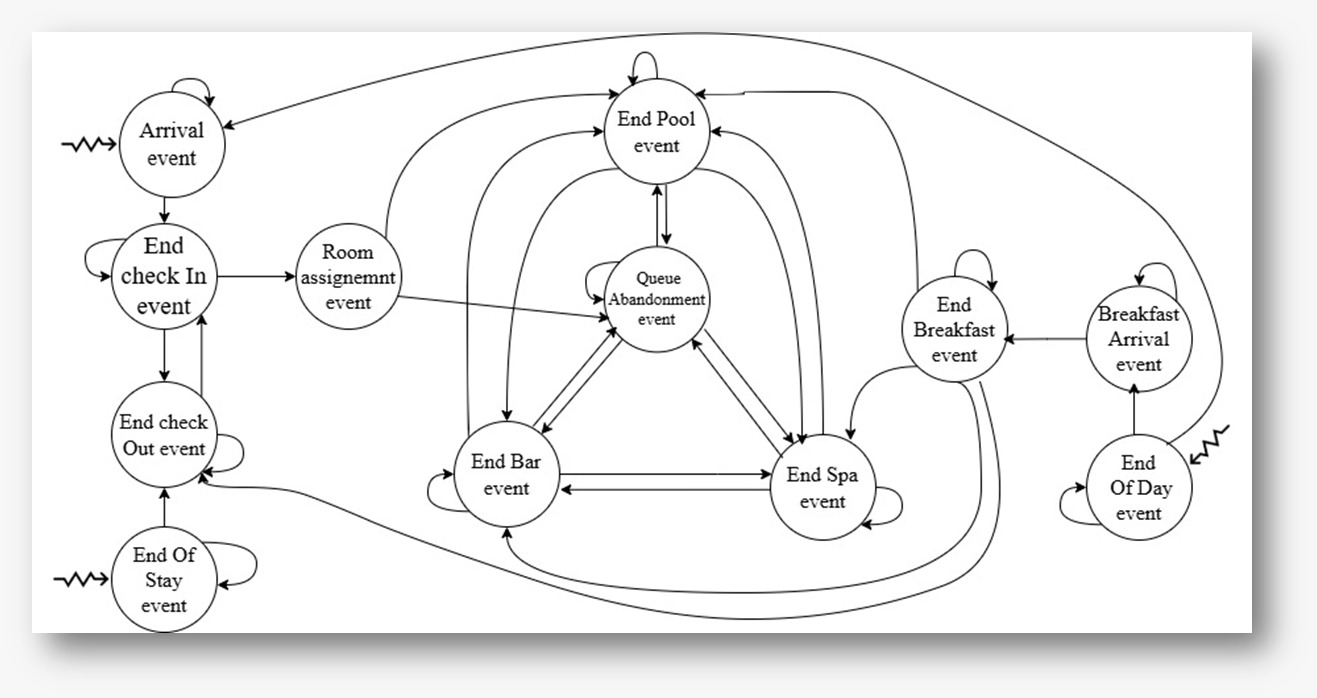

<div style="text-align: center;" dir="rtl">
  <h3><b>תרשים טיפול - אירוע סיום check in</b></h3>
</div>

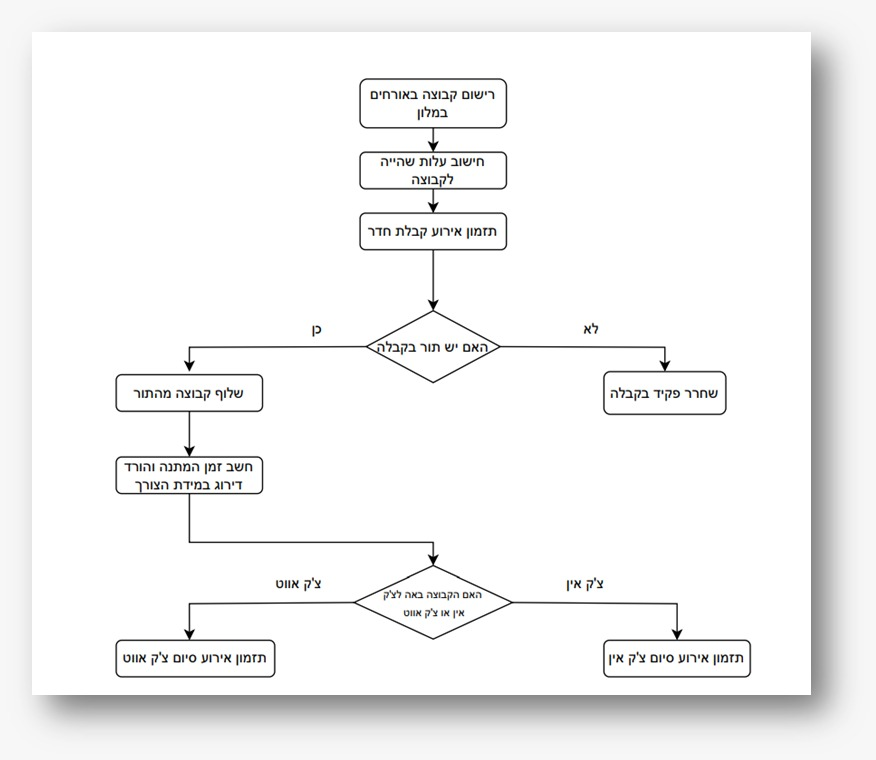


<div style="text-align: center;" dir="rtl">
  <h3><b>תרשים טיפול - אירוע נטישת תור</b></h3>
</div>

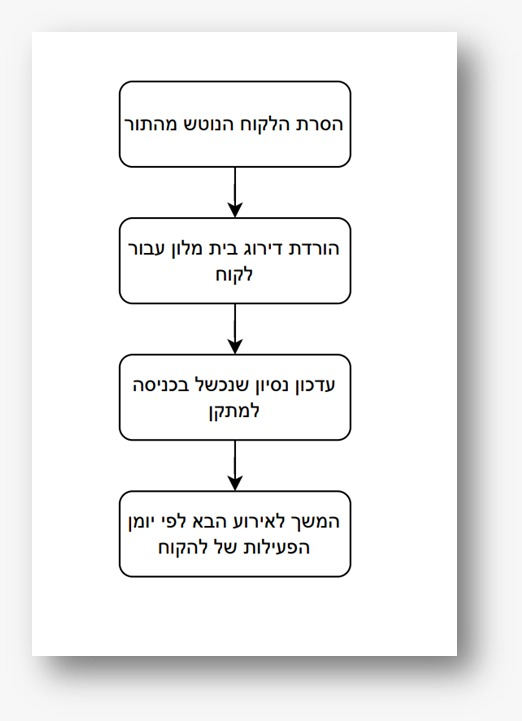


<div style="text-align: center;" dir="rtl">
  <h3><b>תרשים טיפול - אירוע סיום יום</b></h3>
</div>

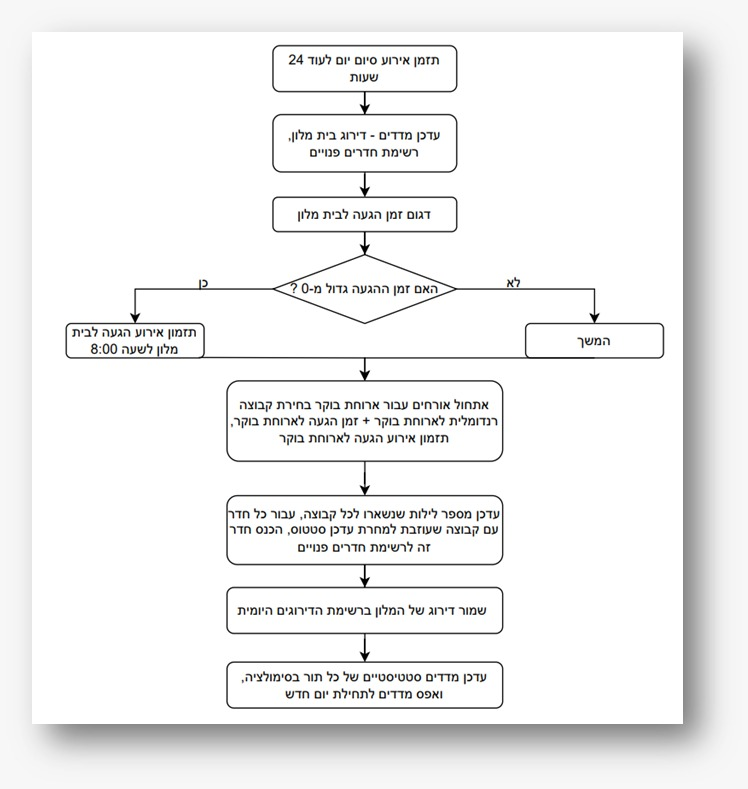




<div dir="rtl" style="text-align: right;">

**בחירת ממדים:**

**רייטינג (דירוג אורחים)** הוא מדד מרכזי להערכת שביעות רצון כללית מהשהות במלון. הוא משקף חוויות של לקוחות בפועל .

**אורך תור ממוצע בארוחת הבוקר** מהווה אינדיקציה ישירה לאיכות תהליך השירות והתפעול בשעות השיא. תורים ארוכים עלולים לפגוע בחוויית האורח, גם אם שאר המרכיבים במלון חיוביים.

שני המדדים יחד נותנים תמונה מאוזנת: **אחד איכותי (תחושות ודירוג)** והשני **כמותי-תפעולי (מדיד וזמני)** – ומאפשרים להבין גם את רמת שביעות הרצון הכללית וגם את היעילות התפעולית בפועל.

נדגיש את ההצדקה שבשילוב המדדים, מכיוון שהרייטינג מצביע ישירות על איכות המלון כלפי חוץ, נרצה בהמשך לבדוק חלופה לשיפורו ומאחר וכל שיפור במדד הרייטינג יכול להביא עימו הגעה גבוהה יותר של לקוחות (לפי אלגוריתם הדגימה להגעת לקוחות) נרצה להיות בבקרה לגבי תור שמצאנו ככזה שנוצר בו צוואר בקבוק באופן קבוע במהלך ההרצות ולראות שעם שיפור מדד הרייטינג אנחנו לא מחמירים את מדד התור בהתאמה.

</div>


# Guests Classes

In [ ]:
#Guests classes
class Customer:
    def __init__(self, reneging_time,group):
        self.rank = 10
        self.reneging_time = reneging_time
        self.group = group
        self.activity_diary = []

    def decrease_rank (self, decrease_value):
        counter = self.rank - decrease_value
        if counter < 0 :
            self.rank = 0
        else :
            self.rank = counter

    #impkements the success of an activity during the day
    def enter_successful(self, activity):
        for act in self.activity_diary:
            if act[0] == activity:
                act[1] = True
                break

    #implements the failiure when abandoning a queue for an activity
    def failed_attempt(self, activity):
        for act in self.activity_diary:
            if act[0] == activity and act[2] < 2:
                act[2] += 1
                break

    #returns the next activity that the customer needs to proceed to
    def get_next_activity(self, last_activity):
        unattempted_activities = [act for act in self.activity_diary if not act[1] and act[0] != last_activity and act[2] < 2]
        if unattempted_activities:
            return unattempted_activities[0][0]  # returns the first activity according to diary ordering
        return None

class Group:
    def __init__(self, amount_of_members, stay_time):
        self.amount_of_members = amount_of_members
        self.customers = []
        self.stay_nights = stay_time
        self.create_customers()
        self.nights_left = stay_time
        self.split = False
        self.is_last_day = False
        self.room_assigned = None

    def create_customers(self):
      if self.amount_of_members == 1:
          reneging_time = 20
      elif self.amount_of_members == 2:
          reneging_time = 15
      else:
          reneging_time = 10
      for _ in range(self.amount_of_members):
          self.customers.append(Customer(reneging_time, self))

    #generating the activity diary for each member in the group
    def generate_activity_diary(self):
        if 3 <= self.amount_of_members <= 5:
            u = random.random()
            for customer in self.customers:
                if 0 <= u <= 0.8:
                  customer.activity_diary = [['pool', False, 0], ['bar', False, 0]]
                else:
                    customer.activity_diary = [['bar', False,0], ['pool', False,0]]

        elif self.amount_of_members == 2:
            u = random.random()
            if 0 <= u <= 0.7:
                self.split = False
                for customer in self.customers:
                    customer.activity_diary = [['pool', False,0], ['spa', False,0]]
            else:
                self.split = True
                self.customers[0].activity_diary = [['pool', False,0], ['spa', False,0]]
                self.customers[1].activity_diary = [['room', False,0], ['spa', False,0]]

        elif self.amount_of_members == 1:

            self.customers[0].activity_diary =[['pool', False,0],['spa', False,0], ['bar', False,0]]


    def set_stay_nights(self):
          self.nights_left =max(0,self.nights_left - 1)
          if self.nights_left == 0:
              self.is_last_day = True


    def set_room(self, room):
        self.room_assigned = room

    def decrease_rank(self, decrease_value):
        for customer in self.customers:
            customer.decrease_rank(decrease_value)

    def get_average_ranking(self):
        total_rank = 0
        for index, customer in enumerate(self.customers):
            total_rank += customer.rank
        average_rank = total_rank/self.amount_of_members
        return average_rank

# Facilities Classes

In [ ]:
#Facilities classes
class RoomStatus(Enum):
    available = "available"
    occupied = "occupied"
    available_to_be = "available_to_be"
    pending_assignment = "pending_assignment"


class Room:
  def __init__(self, room_type, status = RoomStatus.available):
    self.room_type = room_type
    self.status = status
    self.staying_group = None

  def change_status(self, new_status):
    self.status = new_status

  def set_staying_group(self, group):
      self.staying_group = group


class Hotel:
    def __init__(self):
        self.room_list = []  # List of all rooms
        self.available_rooms = []  # List of available rooms
        self.create_hotel_rooms()
        self.current_guests = [] # list of current guests
        self.total_revenue = 0
        self.total_room_revenue = 0
        self.current_H = 7
        self.current_Ravailable = 110
        self.daily_income = []
        self.daily_ratings = []


    def create_hotel_rooms(self):
        # 30 rooms for 4 or 5 people (family)
        for _ in range(30):
            room = Room("family")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 40 rooms for 2 or 3 people (standard)
        for _ in range(40):
            room = Room("Standard")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 30 rooms for 1 or 2 people (couple)
        for _ in range(30):
            room = Room("couple")
            self.room_list.append(room)
            self.available_rooms.append(room)

        # 10 suites for 1 or 2 people (extra charge)
        for _ in range(10):
            room = Room("Suite")
            self.room_list.append(room)
            self.available_rooms.append(room)

    def check_available_rooms(self, group):
        """Returns the first available room that fits the group size."""
        if len(self.available_rooms) == 0:
            return None  # No available rooms

        group_size = group.amount_of_members

        # Decide once whether the group wants a Suite (only relevant for 1 or 2 people)
        wants_suite = Algorithm.sample_customer_suite() if group_size in (1, 2) else False

        match group_size:
            case 1:
                if wants_suite:
                    for room in self.available_rooms:
                        if room.room_type == "Suite":
                            return room
                else:
                    for room in self.available_rooms:
                        if room.room_type == "couple":
                            return room

            case 2:
                if wants_suite:
                    for room in self.available_rooms:
                        if room.room_type == "Suite":
                            return room
                else:
                    for room in self.available_rooms:
                        if room.room_type in ("couple", "Standard"):
                            return room

            case 3:
                for room in self.available_rooms:
                    if room.room_type == "Standard":
                        return room

            case 4 | 5:
                for room in self.available_rooms:
                    if room.room_type == "family":
                        return room

        return None  # If no matching room is found

    def occupation_room(self, room, group):
      self.available_rooms.remove(room)


    def calc_H(self):
        total_rank = 0
        if self.current_guests:
            for group in self.current_guests:
                total_rank += group.get_average_ranking()
            self.current_H = total_rank/len(self.current_guests)
        # if there are no guests in the hotel, the last current rating that was updated will stay


    def calc_Ravailable(self):
        if len(self.available_rooms) > 0:
            self.current_Ravailable = len(self.available_rooms)
        else:
            self.current_Ravailable = 0

    def update_hotel_metrics(self):
        self.calc_H()
        self.calc_Ravailable()



    def room_cost(self, room, group):
        base_price = 250 * group.amount_of_members * group.stay_nights
        if room.room_type == "Suite":
            base_price += 120
        self.total_room_revenue += base_price

    def initialize_guests_for_breakfast(self, breakfast):
        for group in self.current_guests:
            breakfast.pending_breakfast_groups.append(group)

class Bar:
    def __init__(self):
        self.available_servers = 2
        # Bar menu with prices for drinks and meals
        self.bar_menu = {
            'coffee': 3,
            'juice': 3,
            'beer': 3,
            'wine': 10,
            'cocktail': 15,
            'toast': 10,
            'salad': 12,
            'ice cream': 3,
            'fish and chips': 15
        }
        self.bar_income = 0
        self.opening_hour = time(0, 0)
        self.closing_hour = time(23, 59)

    def is_idle(self):
        if self.available_servers > 0:
            return True
        else:
            return False

    def assign_server(self):
            self.available_servers -= 1


    def release_server(self):
            self.available_servers += 1


class Pool:
    def __init__(self):
        # Operating hours for the pool (7:00 to 19:00)
        self.opening_hour = time(7, 0)
        self.closing_hour = time(19, 0)
        self.chairs = 50
        self.available_chairs = self.chairs

    def enter_pool(self, group_size): #Grabs a chair by the pool if available
        self.available_chairs -= group_size


    def leave_pool(self, group_size): #Releases a chair and leave the pool
        self.available_chairs += group_size

    def check_spots(self, group_size):
        return self.available_chairs > group_size

    def is_open(self, current_time):
        return self.opening_hour <= current_time.time() < self.closing_hour


class Spa:
    def __init__(self): # Operating hours for the spa (7:00 to 19:00)
        self.opening_hour = time(7, 0)
        self.closing_hour = time(19, 0)
        self.max_guests = 30  # Maximum number of guests allowed
        self.occupied_spots = 0  # Tracks the number of guests currently inside

    def check_spots(self, guest_size):
        if self.max_guests - self.occupied_spots >= guest_size:
            return True
        return False

    def enter_spa(self, guest_size):
        self.occupied_spots += guest_size

    def leave_spa(self, guest_size):
        self.occupied_spots -= guest_size


    def is_open(self, current_time):
        return self.opening_hour <= current_time.time() < self.closing_hour



class Breakfast:
    def __init__(self):
        # Operating hours for the breakfast (7:00 to 19:00)
        self.opening_hour = time(6, 30)
        self.closing_hour = time(11, 30)
        self.max_guests = 60  # Maximum number of guests allowed
        self.occupied_spots = 0  # Tracks the number of guests currently inside
        self.pending_breakfast_groups = []

    def check_spots(self, group_size):
        return self.occupied_spots + group_size <= self.max_guests

    def enter_breakfast(self, group_size):
        self.occupied_spots += group_size

    def leave_breakfast(self, group_size):
        self.occupied_spots = max(0, self.occupied_spots - group_size)

    def is_open(self, current_time):
        return self.opening_hour <= current_time.time() < self.closing_hour


class Reception:
    def __init__(self):
        self.opening_hour = time(7, 30)
        self.closing_hour = time(17, 0)
        self.available_servers = 2

    def is_idle(self):
        if self.available_servers > 0:
            return True
        else:
            return False

    def assign_server(self):
            self.available_servers -= 1


    def release_server(self):
            self.available_servers += 1

    def is_open(self, current_time):
        return self.opening_hour <= current_time.time() < self.closing_hour

#Queue Class

In [ ]:
#Queue class
class QueueServer:
    def __init__(self):
        self.server_queue = []  # a list to hold the queue
        self.active_hours = 0 # when the regarding facility of the queue is open and active, the queue is active
        self.waiting_times = []  # list for all  waiting times for the average waiting time
        self.total_queue_length_time = 0  # summing the lengths of queue over time
        self.queue_lengths = [0]  # list to track the queue length every time it changes
        self.queue_change_times = []  # tracking the time of changes
        self.daily_avg_queue_lengths = [0] #to save the daily lengths over simulation days
        self.daily_avg_waiting_times = [0]

    # Adds a guest (customer or group) to the queue
    def add(self, guest, arrival_time):
        self.server_queue.append([guest, arrival_time])
        self.record_queue_length(arrival_time)

    # Adds a guest to the reception queue
    def add_to_reception(self, guest, arrival_time, status):
        self.server_queue.append([guest, arrival_time, status])
        self.record_queue_length(arrival_time)


    def show_first(self):
        return self.server_queue[0]

    # Removes and returns the first guest in line according to FIFO
    def pop(self, removing_time):
        if self.server_queue:
            extracted = self.server_queue.pop(0)
            self.record_queue_length(removing_time)
            self.record_waiting_time(extracted[1], removing_time)
            return extracted
        return None

    #removes searched customer for the abandonment event
    def remove(self, removing_time, customer_to_remove):
        for customer in self.server_queue:
            if customer == customer_to_remove:
                self.server_queue.remove(customer)
                self.record_queue_length(customer_to_remove)


    def set_active_hours(self, opening_hour, closing_hour):
      #dummy date is needed for being able to subtract the openning hour from the closing hour
        dummy_date = datetime.today().date()
        opening_dt = datetime.combine(dummy_date, opening_hour)
        closing_dt = datetime.combine(dummy_date, closing_hour)
        duration = closing_dt - opening_dt
        duration_in_hours = duration.total_seconds() / 3600
        self.active_hours = duration_in_hours


    def size(self):  # Returns the number of groups in the queue
        return len(self.server_queue)


    def record_waiting_time(self, arrival_time, removing_time):
        waiting_time = removing_time - arrival_time
        self.waiting_times.append(waiting_time)

    def record_queue_length(self, current_time):
        if self.queue_lengths and self.queue_change_times:
            last_time = self.queue_change_times[-1]
            duration = current_time - last_time
            duration_hours = duration.total_seconds() / 3600
            self.total_queue_length_time += self.queue_lengths[-1] * duration_hours
        self.queue_change_times.append(current_time)
        self.queue_lengths.append(self.size())


     # saving the daily queue regarding metrics and updating variables accordingly
    def calc_daily_statistics(self):
        # Weighted average queue length
        daily_avg_queue_length = self.total_queue_length_time /self.active_hours
        self.daily_avg_queue_lengths.append(daily_avg_queue_length)
        daily_avg_waiting_times = np.mean(self.waiting_times) if self.waiting_times else 0
        self.daily_avg_waiting_times.append(daily_avg_waiting_times)
        self.total_queue_length_time = 0
        self.queue_change_times = []
        self.queue_lengths = []
        self.waiting_times = []

    def insert(self, guest,time):
        self.server_queue.insert(0, [guest,time])
        self.record_queue_length(time)



# Event Classes

In [ ]:
#Events classes
class Event:
    def __init__(self, time):
        self.time = time

    def __lt__(self, other):
        return self.time < other.time  # Ensure the heap sorts by time


    def handle(self, simulation):
        raise NotImplementedError("Handle method must be implemented by subclasses")


class ArrivalEvent(Event):
    def __init__(self, time,group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        #handling the arriving group
        room = simulation.hotel.check_available_rooms(self.group)
        if room:
            room.change_status(RoomStatus.pending_assignment)
            simulation.hotel.occupation_room(room, self.group)
            self.group.set_room(room)
        #handeling the current arrival
            if simulation.reception.is_open(self.time):
                if simulation.reception.is_idle() and simulation.queue_reception.size() == 0:
                    simulation.reception.assign_server()
                    service_time = self.time + timedelta(minutes=Algorithm.check_in_duration())
                    simulation.schedule_event(EndCheckInEvent(service_time, self.group))
                else:
                    simulation.queue_reception.add_to_reception(self.group, self.time, status="check_in")

        current_R = simulation.hotel.current_Ravailable
        current_H = simulation.hotel.current_H
        sample_arrival_time = Algorithm.customer_arrival_time(current_H, current_R)
        next_arrival_time = self.time + timedelta(hours=sample_arrival_time)

        # taking care of the event arrival event creation
        customer_type = Algorithm.customer_type()
        stay_time = Algorithm.customer_stay_time()
        group = Group(customer_type, stay_time)
        if time(8, 0) <= next_arrival_time.time() < time(17, 0):
            simulation.schedule_event(ArrivalEvent(next_arrival_time, group))
        else:
            return
'''when next arrival time sampled is not within the arrival hours, the
    arrival event wil stop it's on creation and will be initialized from end of day event
    conditioned on new hotel metrics (R,H)'''

class EndCheckInEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.handled_group = group
        self.room = group.room_assigned


    def handle(self, simulation):
        # if handled group have available room
        simulation.hotel.current_guests.append(self.handled_group)
        simulation.hotel.room_cost(self.room, self.handled_group)
        next_entry_time = self.time if self.time.hour >= 15 else self.time.replace(hour=15, minute=0, second=0)
        simulation.schedule_event(RoomAssignmentEvent(next_entry_time, self.handled_group, self.room))
        # if the queue is not empty, handle the next group in queue
        if simulation.queue_reception.size() > 0:
            next_group = simulation.queue_reception.pop(self.time)
            waiting_time = simulation.queue_reception.waiting_times[-1].total_seconds() / 60
            decrease_value = (waiting_time // 20) * 0.02
            self.handled_group.decrease_rank(decrease_value)
            if next_group[2] == "check_in":
                next_check_in_time =self.time + timedelta(minutes = Algorithm.check_in_duration())
                simulation.schedule_event(EndCheckInEvent(next_check_in_time, next_group[0]))
            if next_group[2] == "check_out":
                next_check_out_time = self.time + timedelta(minutes = Algorithm.check_in_duration())
                simulation.schedule_event(EndCheckOutEvent(next_check_out_time, next_group[0]))
        else:
            simulation.reception.release_server()

class RoomAssignmentEvent(Event):
    def __init__(self, time, group, room):
        super().__init__(time)
        self.group = group
        self.room = room

    def handle(self, simulation):
       self.room.change_status(RoomStatus.occupied)
       self.room.set_staying_group(self.group)
        # The group will go to the pool after assigned to room if possible
       if simulation.pool.is_open(self.time):
            if simulation.pool.check_spots(self.group.amount_of_members) and simulation.queue_pool.size() == 0: # The pool has available chairs and no queue
                simulation.pool.enter_pool(self.group.amount_of_members)
                next_pool_duration =self.time + timedelta(hours = Algorithm.calc_pool_duration())
                for customer in self.group.customers:
                    simulation.schedule_event(EndPoolEvent(next_pool_duration, customer))
            if simulation.queue_pool.size() > 0: #The pool has queue
                for customer in self.group.customers:
                    simulation.queue_pool.add(customer, self.time)
                    next_abandonment_time = self.time + timedelta(minutes = customer.reneging_time )
                    simulation.schedule_event(QueueAbandonmentEvent( next_abandonment_time, customer, 'pool',simulation.queue_pool))


class EndCheckOutEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.handled_group = group

    def handle (self, simulation):
        # handling the checkout itself, updating room and hotel data.
        if not self.handled_group.room_assigned.status == RoomStatus.pending_assignment:
            self.handled_group.room_assigned.change_status(RoomStatus.available)
            self.handled_group.room_assigned.set_staying_group(None)
        simulation.hotel.current_guests.remove(self.handled_group)
        if simulation.queue_reception.size() > 0:
            next_group_tuple = simulation.queue_reception.pop(self.time)
            next_group = next_group_tuple[0]
            waiting_time = simulation.queue_reception.waiting_times[-1].total_seconds() / 60
            decrease_value = (waiting_time // 20) * 0.02
            self.handled_group.decrease_rank(decrease_value)
            if next_group_tuple[2] == "check_in":
                next_check_in_time =self.time + timedelta(minutes = Algorithm.check_in_duration())
                simulation.schedule_event(EndCheckInEvent(next_check_in_time, next_group))
            if next_group_tuple[2] == "check_out":
                next_check_out_time = self.time + timedelta(minutes = Algorithm.check_in_duration())
                simulation.schedule_event(EndCheckOutEvent(next_check_out_time, next_group))

        else:
            simulation.reception.release_server()

class QueueAbandonmentEvent(Event):
    def __init__(self, time, customer, facility, queue):
        super().__init__(time)
        self.customer_to_remove = customer #desparate customer from the queue
        self.facility_attempted = facility #abandoned facility as a string
        self.regarding_queue = queue #abandoned queue as a queue object

    def handle (self, simulation):
        self.regarding_queue.remove(self.time, self.customer_to_remove)
        self.customer_to_remove.decrease_rank(0.03)
        self.customer_to_remove.failed_attempt(self.facility_attempted)
        simulation.proceed_to_next_activity(self.time, self.customer_to_remove, self.facility_attempted)


class EndBarEvent(Event):
    def __init__(self, time, customer):
        super().__init__(time)
        self.handled_customer = customer

    def handle (self, simulation):
        order, price = Algorithm.sample_bar_order(self.handled_customer)
        simulation.bar.bar_income += price
        simulation.proceed_to_next_activity(self.time, self.handled_customer, 'bar')
        if simulation.queue_bar.size() > 0:
            next_customer = simulation.queue_bar.pop(self.time)[0]
            next_customer.enter_successful('bar')
            next_customer_ending_time =self.time + timedelta(minutes = Algorithm.bar_service_time())
            simulation.schedule_event(EndBarEvent(next_customer_ending_time, next_customer))
        else:
            simulation.bar.release_server()


class EndSpaEvent(Event):
    def __init__(self, time, customer):
      super().__init__(time)
      self.leaving_customer = customer


    def handle(self, simulation):
        simulation.spa.leave_spa(1)
        simulation.proceed_to_next_activity(self.time, self.leaving_customer, 'spa')
        if simulation.queue_spa.size() > 0:
            if simulation.spa.check_spots(1):
                next_customer = simulation.queue_spa.pop(self.time)[0]
                next_customer.enter_successful('spa')
                simulation.spa.enter_spa(1)

                treatment_time =self.time + timedelta(hours = Algorithm.calc_spa_duration())
                simulation.schedule_event(EndSpaEvent(treatment_time, next_customer))


class EndPoolEvent(Event):
    def __init__(self, time, customer):
        super().__init__(time)
        self.leaving_customer = customer

    def handle(self, simulation):
        simulation.proceed_to_next_activity(self.time, self.leaving_customer,'pool')
        simulation.pool.leave_pool(1)
        '''checking if the leaving customer is a part from a separated couple that has split today so the partner
        needs to proceed to the next activity from his room'''
        customer_group = self.leaving_customer.group
        if customer_group.amount_of_members == 2 and customer_group.split:
            customer_group.customers[1].enter_successful('room')
            simulation.proceed_to_next_activity(self.time, customer_group.customers[1], 'room')
        if simulation.queue_pool.size() > 0: #There are people in the queue
            if simulation.pool.check_spots(1):
                next_guest = simulation.queue_pool.pop(self.time)[0]
                next_guest.enter_successful('pool')
                simulation.pool.enter_pool(1)
                pool_duration_time =self.time + timedelta(hours = Algorithm.calc_pool_duration())
                simulation.schedule_event(EndPoolEvent(pool_duration_time, next_guest))


class BreakfastArrivalEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        # The time for breakfast is not over
        if self.time.hour < 11 or (self.time.hour == 11 and self.time.minute < 30):
            '''There are more guests that pending to arrive for breakfast
                Create next ArrivalBreakfastEvent'''
            if simulation.breakfast.pending_breakfast_groups:
                random_group = random.choice(simulation.breakfast.pending_breakfast_groups)
                x = Algorithm.breakfast_arrival_time()
                Arrival_for_breakfast_time = self.time + timedelta(minutes=x)
                simulation.schedule_event(BreakfastArrivalEvent(Arrival_for_breakfast_time, random_group))
                simulation.breakfast.pending_breakfast_groups.remove(random_group)


            if simulation.breakfast.check_spots(self.group.amount_of_members):
                EndBreakfast_time = self.time + timedelta(minutes=Algorithm.breakfast_duration())

                if self.group.nights_left == 0:  # If the room leaves today can only enter until 11
                    if self.time.time() < time(11, 0):
                        if EndBreakfast_time.time() < time(11, 0):
                            simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, self.group))
                        else:
                            eleven_am = datetime.combine(self.time.date(), time(11, 0))
                            simulation.schedule_event(EndBreakfastEvent(eleven_am, self.group))  # If the time drawn is after 11, we will create an end event for 11

                    else:  # A customer who leaves after 11 will not take care of him
                        return
                else:
                    simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, self.group))  # If there is room for the room, create an event to end breakfast for the room
                simulation.breakfast.enter_breakfast(self.group.amount_of_members)

            else:  # Entering the queue if there is no space
                breakfast_queue = simulation.queue_breakfast
                breakfast_queue.add(self.group, self.time)

        else:  # Release all guests to start their day
            for group in simulation.breakfast.pending_breakfast_groups:
                if not (self.group.nights_left == 0):
                    group.generate_activity_diary()
                    for customer in self.group.customers:
                        simulation.proceed_to_next_activity(self.time, group)


class EndBreakfastEvent(Event):
    def __init__(self, time, group):
        super().__init__(time)
        self.group = group

    def handle(self, simulation):
        # Exclusion of the customer from breakfast
        simulation.breakfast.leave_breakfast(self.group.amount_of_members)

        # Downgraded from breakfast
        for customer in self.group.customers:
            if not Algorithm.is_breakfast_tasty(simulation.upper_bound):
                customer.decrease_rank(0.025)

        # Creating a checkout for the finished customer
        if self.group.nights_left == 0:
            if simulation.queue_reception.size() == 0 and simulation.reception.is_idle():
                next_check_out_time = self.time + timedelta(minutes=Algorithm.check_out_duration())
                simulation.schedule_event(EndCheckOutEvent(next_check_out_time, self.group))
                simulation.reception.assign_server()
            else:
                simulation.queue_reception.add_to_reception(self.group, self.time, 'check_out')

        else:  # To release to schedule
            self.group.generate_activity_diary()
            for customer in self.group.customers:
                simulation.proceed_to_next_activity(self.time, customer)


        if not simulation.queue_breakfast.size() == 0:
            next_group,arrival_time = simulation.queue_breakfast.pop(self.time)

            if simulation.breakfast.check_spots(next_group.amount_of_members):
                EndBreakfast_time = self.time + timedelta(minutes=Algorithm.breakfast_duration())
                breakfast_queue = simulation.queue_breakfast

                if next_group.nights_left == 0:  # If the room leaves today can only enter until 11
                    if self.time.time() < time(11, 0):
                        if EndBreakfast_time.time() < time(11, 0):
                            simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, next_group))

                        else:
                            eleven_am = datetime.combine(self.time.date(), time(11, 0))
                            simulation.schedule_event(EndBreakfastEvent(eleven_am, next_group))  # If the time drawn is after 11, we will create an end event for 11

                    else:  # A customer who leaves after 11 will not take care of him

                        return
                else:
                    simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, next_group))  # If there is room for the room, create an event to end breakfast for the room

                simulation.breakfast.enter_breakfast(next_group.amount_of_members)
            else:  # If there is no room after he waited in line, he will continue to wait but still first in line
                breakfast_queue = simulation.queue_breakfast
                breakfast_queue.insert(next_group, self.time)
                return  # Without calculating indices because they did not enter

            # Rating calculation waiting time
            waiting_time = self.time - arrival_time
            minutes_passed = waiting_time.total_seconds() // 60  # Checking how many minutes have passed
            next_group.decrease_rank((minutes_passed // 20) * 0.02)


class EndOfDayEvent(Event):
    def handle(self, simulation):
        #creating the next end of the day event
        next_EndOfDay_time = self.time +timedelta(hours = 24)
        simulation.schedule_event(EndOfDayEvent(next_EndOfDay_time))
        #updating the metrics of the hotel
        simulation.hotel.update_hotel_metrics()
        current_R = simulation.hotel.current_Ravailable
        current_H = simulation.hotel.current_H
        sample_arrival_time = Algorithm.customer_arrival_time(current_H, current_R)
        '''checking if arrival event needs to be initialized
        after stopping its creation when the sample arrival time is 0'''
        current_day = self.time.date()
        if sample_arrival_time > 0:
            next_arrival_time = datetime.combine(current_day, time(8, 0))
            customer_type = Algorithm.customer_type()
            stay_time = Algorithm.customer_stay_time()
            group = Group(customer_type, stay_time)
            simulation.schedule_event(ArrivalEvent(next_arrival_time, group))
        #initializing the first breakfast arrival event for the day
        simulation.hotel.initialize_guests_for_breakfast(simulation.breakfast)
        first_group = Algorithm.randomize_group(simulation.breakfast.pending_breakfast_groups)
        x = Algorithm.breakfast_arrival_time()
        Arrival_for_breakfast_time = self.time + timedelta(hours=6.5, minutes=x)
        simulation.schedule_event(BreakfastArrivalEvent(Arrival_for_breakfast_time, first_group))
        # updating guests number of stay nights
        if simulation.hotel.current_guests:
            for group in simulation.hotel.current_guests:
                group.set_stay_nights()
        #updating rooms status and available rooms list
        for room in simulation.hotel.room_list:
            if room.staying_group is not None:
                if room.staying_group.nights_left == 0:
                    room.change_status(RoomStatus.available_to_be)
                    simulation.hotel.available_rooms.append(room)
        #updating hotel daily rating
        simulation.hotel.daily_ratings.append(simulation.hotel.current_H)
        #updating and calculating queue regarding metrics
        for attr_name in vars(simulation):
            attr_value = getattr(simulation, attr_name)
            if isinstance(attr_value, QueueServer):
                attr_value.calc_daily_statistics()
                attr_value.server_queue = []


class EndOfStayEvent(Event):

    def handle(self, simulation):
      # generating next event
        next_end_of_stay= self.time + timedelta(days=1)
        simulation.schedule_event(EndOfStayEvent(next_end_of_stay))

        # The group that is supposed to leave today did not arrive for breakfast
        for group in simulation.breakfast.pending_breakfast_groups:
            if group.nights_left == 0: #the group needs to check out today

                simulation.breakfast.pending_breakfast_groups.remove(group)  # Remove the group from breakfast
                if simulation.queue_reception.size() == 0 and simulation.receptionis_idle():
                    next_check_out_time = self.time + timedelta(minutes=Algorithm.check_out_duration())
                    simulation.schedule_event(EndCheckOutEvent(next_check_out_time, group))  # Create a check-out event
                    simulation.reception.assign_server()  # Update the number of busy reception servers
                else:
                    simulation.queue_reception.add_to_reception((group, self.time, 'check_out'))  # Add the customer to the reception queue

# Simulation Class

In [ ]:
#Simulation class
class Simulation:

    def __init__(self, running_time, upper_bound=0.1):
            self.hotel = Hotel()
            self.bar = Bar()
            self.pool = Pool()
            self.spa = Spa()
            self.breakfast = Breakfast()
            self.reception = Reception()
            self.queue_reception = QueueServer()
            self.queue_pool = QueueServer()
            self.queue_spa = QueueServer()
            self.queue_breakfast = QueueServer()
            self.queue_bar = QueueServer()
            self.event_diary =[] #minimum heap
            self.clock = datetime(2025, 3, 1, 0, 0, 0)
            self.running_time = running_time
            self.heat_time = running_time/8
            self.sync_queue_active_hours()
            self.upper_bound = upper_bound


    def sync_queue_active_hours(self):
        for attr_name in vars(self):
            attr_value = getattr(self, attr_name)
            if isinstance(attr_value, QueueServer) or isinstance(attr_value, QueueServer):
                if attr_name.startswith("queue_"):
                    facility_name = attr_name.replace("queue_", "")
                    if hasattr(self, facility_name):
                        facility = getattr(self, facility_name)
                        if hasattr(facility, 'opening_hour') and hasattr(facility, 'closing_hour'):
                            opening_hour = facility.opening_hour
                            closing_hour = facility.closing_hour
                            attr_value.set_active_hours(opening_hour, closing_hour)


    def run(self):
        #initializing events from main loop
        customer_type = Algorithm.customer_type()
        stay_time = Algorithm.customer_stay_time()
        group = Group(customer_type, stay_time)
        self.schedule_event(ArrivalEvent(self.clock + timedelta(hours=8), group))
        self.schedule_event(EndOfDayEvent(self.clock + timedelta(hours=24)))
        self.schedule_event(EndOfStayEvent(self.clock + timedelta(hours=35)))
        end_simulation_time = self.clock + timedelta(hours=self.running_time*24)
        while self.event_diary and self.clock < end_simulation_time:
            event = heapq.heappop(self.event_diary)
            if event.__class__.__name__ == 'QueueAbandonmentEvent':
                guest = event.customer_to_remove
                flag = False

                for row in guest.activity_diary:
                    if row[0] == event.facility_attempted:
                        if row[1]:
                            flag = True
                            break

                if flag:
                    continue

            self.clock = event.time
            event.handle(self)



    def schedule_event(self, event):
        heapq.heappush(self.event_diary, event)


    def proceed_to_next_activity(self,time, customer,  last_activity = None): # None refers to breakfast
        activity = customer.get_next_activity(last_activity)
        if activity == 'pool':
            if self.pool.is_open(time):
                #there is place in the pool
                if self.queue_pool.size() == 0 and self.pool.check_spots(1):
                    customer.enter_successful('pool')
                    self.pool.enter_pool(1)
                    next_ending_pool = time + timedelta(hours=Algorithm.calc_pool_duration())
                    self.schedule_event(EndPoolEvent(next_ending_pool, customer))
                else:
                    # there is no place at the pool
                    self.queue_pool.add(customer, time)
                    next_abandonment_event = time + timedelta(minutes=customer.reneging_time)
                    self.schedule_event(QueueAbandonmentEvent(next_abandonment_event,customer,'pool',self.queue_pool))

        if activity == 'bar':
            if self.queue_bar.size() == 0 and self.bar.is_idle() :
                customer.enter_successful('bar')
                self.bar.assign_server()
                next_ending_bar = time + timedelta(minutes=Algorithm.bar_service_time())
                self.schedule_event(EndBarEvent(next_ending_bar, customer))
            else:
                self.queue_bar.add(customer, time)
                next_abandonment_event = time + timedelta(minutes=customer.reneging_time)
                self.schedule_event(QueueAbandonmentEvent(next_abandonment_event,customer,'bar',self.queue_bar))

        if activity == 'spa':
            if self.spa.is_open(time):
                if self.queue_spa.size() == 0  and self.spa.check_spots(1):
                    customer.enter_successful('spa')
                    self.spa.enter_spa(1)
                    next_ending_spa = time + timedelta(hours=Algorithm.calc_spa_duration())
                    self.schedule_event(EndSpaEvent(next_ending_spa, customer))
                else:
                    self.queue_spa.add(customer, time)
                    next_abandonment_event = time + timedelta(minutes=customer.reneging_time)
                    self.schedule_event(QueueAbandonmentEvent(next_abandonment_event,customer,'spa',self.queue_spa))


    def welsh_method(self,data, w):

        n = len(data)
        welsh_averages = []

        for i in range(n):
            if i < w:
                # Case 1: Start of the series (dynamically growing window)
                start_idx = 0
                end_idx = i + i + 1  # Adjust to include all points for s = -(i-1) to s = (i-1)
                numerator = np.sum(data[start_idx:end_idx])
                denominator = 2 * (i + 1) - 1
            elif i < n - w:
                # Case 2: Fixed-size window
                start_idx = i - w
                end_idx = i + w + 1  # Adjust to include all points for s = -w to s = w
                numerator = np.sum(data[start_idx:end_idx])
                denominator = 2 * w + 1
            else:
                # Adjust denominator at the end of the array
                start_idx = max(0, i - w)
                end_idx = n  # Includes all remaining valid points
                numerator = np.sum(data[start_idx:end_idx])
                denominator = end_idx - start_idx  # Adjust to the actual number of points
            avg = numerator / denominator
            welsh_averages.append(avg)

        return welsh_averages



    def plot_heating_time_data(self, data, parameter):

    # parameter refers to the values we are plotting to check when they stabalize

        welsh_avg1 = self.welsh_method(data, 9)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(data) + 1), data, label='Original Data', color='blue')
        plt.plot(range(1, len(data) + 1), welsh_avg1, label='Welsh Averages (Adjusted at End)', linestyle='--', color='green')
        plt.xlabel('Days')
        plt.ylabel('Value')
        plt.title('Heating Time For ' + parameter)
        plt.legend()
        plt.show()


    def calculate_statistics(self):
        daily_avg_queue_lengths = self.queue_breakfast.daily_avg_queue_lengths
        daily_rating = self.hotel.daily_ratings
        self.avg_queue_length = sum(daily_avg_queue_lengths[int(self.heat_time):]) / len(daily_avg_queue_lengths[int(self.heat_time):])
        self.avg_rating = sum(daily_rating[int(self.heat_time):]) / len(daily_rating[int(self.heat_time):])

        return self.avg_queue_length, self.avg_rating

    def plot_metrics(self):
        print("Daily Ratings:", self.hotel.daily_ratings)
        print("Average Rating:", getattr(self, "avg_rating", "לא חושב עדיין"))
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        axes = axes.ravel()

        # x-axis values representing days of the simulation
        days_queue = range(1, len(self.queue_breakfast.daily_avg_queue_lengths) + 1)
        days_rating = range(1, len(self.hotel.daily_ratings) + 1)

        # Plotting breakfast queue length over time
        axs = axes[0]
        axs.step(
            days_queue,
            self.queue_breakfast.daily_avg_queue_lengths,
            where='post',
            label='Daily Average Breakfast Queue Length'
        )
        axs.axhline(
            y=self.avg_queue_length,
            color='r',
            linestyle='--',
            label='Average Breakfast Queue Length'
        )
        axs.set_title('Breakfast Queue Length Over Time')
        axs.set_xlabel('Day of Simulation')
        axs.set_ylabel('Breakfast Queue Length')
        axs.grid(True)
        axs.legend()

        # Plotting daily ratings over time
        axs = axes[1]
        axs.step(
            days_rating,
            self.hotel.daily_ratings,
            where='post',
            label='Daily Rating'
        )
        axs.axhline(
            y=self.avg_rating,
            color='r',
            linestyle='--',
            label='Average Daily Rating'
        )
        axs.set_title('Daily Customer Rating Over Time')
        axs.set_xlabel('Day of Simulation')
        axs.set_ylabel('Rating')
        axs.grid(True)
        axs.legend()

        # Show plot
        plt.tight_layout()
        plt.show()


# Plots for Heating Time

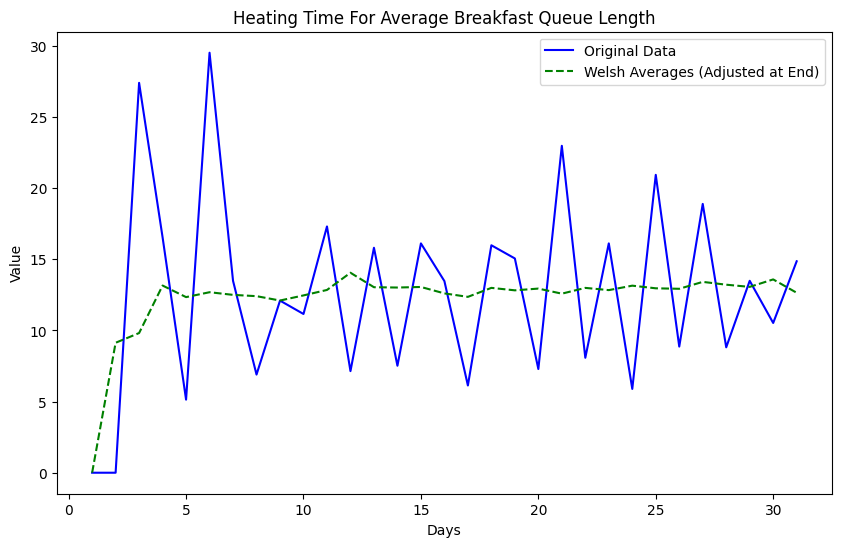

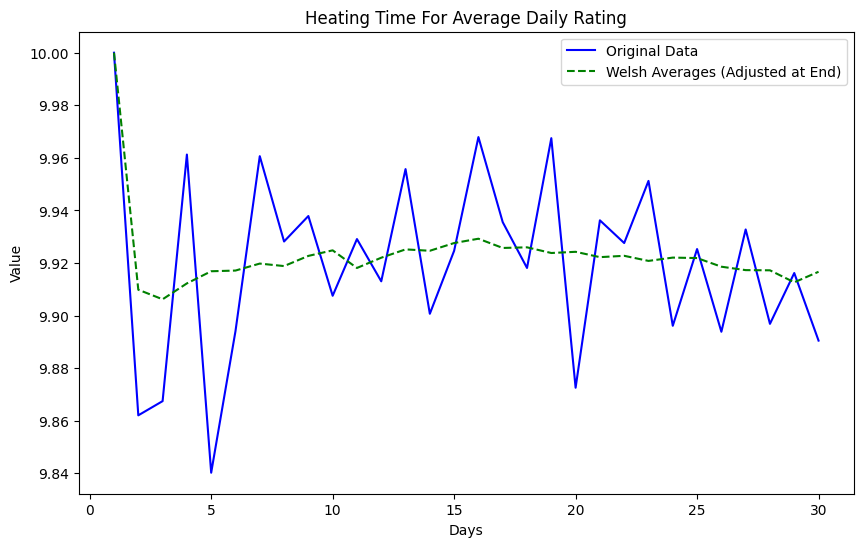

In [ ]:
sim = Simulation(30)
sim.run()

sim.plot_heating_time_data(sim.queue_breakfast.daily_avg_queue_lengths, 'Average Breakfast Queue Length')
sim.plot_heating_time_data(sim.hotel.daily_ratings, 'Average Daily Rating')

<div dir="rtl" align="right">

**קביעת זמן חימום והרצות – ניתוח ומסקנות:**

בשלב ההתחלתי של הסימולציה, המערכת טרם הגיעה לאיזון, ולכן הנתונים הנאספים בתקופה זו אינם מייצגים את ההתנהגות היציבה שלה. שלב זה מכונה *זמן חימום* (Warm-Up Period), ויש להחריג את הנתונים ממנו בעת ניתוח התוצאות.

לאחר בחינה של גרף אורך התור לארוחת הבוקר, ניתן לראות כי המערכת מתייצבת סביב ערכים קבועים לאחר כ-15 ימים ואילו עבור מדד הרייטינג נבחין בהתייצבות לאחר 10 ימים בערך . מכיוון שמדובר בזמן חימום עבור כל הסימולציה, נבחר בזמן חימום של 15 ימים בתור המקסימלי עבור התייצבות המדדים.  
**לפיכך, בחרנו בזמן חימום של 15 ימים** – זמן זה ישמש כסף שממנו ואילך נחשב מדדים ממוצעים, באופן שמייצג את ביצועי המערכת במצב יציב.

בחירה זו נועדה להבטיח ניתוח מדויק ואמין של תוצאות הסימולציה.

בהתאם למה שנלמד בכיתה, זמן הריצה של הסימולציה ייקבע כזמן החימום כפול 7 (כדי לצבור מספיק נתונים יציבים), **בנוסף ל-15 ימי החימום עצמם**.

</div>

# Data Points For Current State

<div dir="rtl" align="right">

**קביעת אופן ההרצה:**
עבור אופן ההרצה בחרנו בReplication / deletion כך שנבצע הרבה ריצות קצרות שמתוכן ייזרק זמן החימום והריצות עצמן יהיו בלתי תלויות. עבור הn ההתחלתי נבחר n=20 ולאחר מכן נבדוק האם אנו עומדים בדיוק יחסי 0.1 עבור רמת מובהקות של 0.9. מכיוון שמדובר בשני אי שוויונים שנרצה לחתום עליהם לפי אי שוויון בונופורני האלפא שתיבחר תהיה
$ \frac{0.1}{2}\ = 0.05$

</div>



In [ ]:
# Create a list to store all results
results = []

# Run 20 simulations
for _ in range(20):
    sim = Simulation(120)
    sim.run()

    # Compute the results for each simulation and store both values
    avg_queue_length, avg_rating = sim.calculate_statistics()

    # Append the results to the list
    results.append({
        'avg_queue_lengths': avg_queue_length,
        'avg_rating': avg_rating
    })

# Create a table
df_results = pd.DataFrame(results)
df_results.index = range(1, 21)

# Calculate mean and standard deviation
average_values_basic = df_results.mean()
std_values_basic = df_results.std()

# Add mean and std rows to the table
df_results.loc['Average'] = average_values_basic
df_results.loc['Standard Deviation'] = std_values_basic

# Store values in variables
avg_queue_mean_basic = average_values_basic['avg_queue_lengths']
avg_queue_std_basic = std_values_basic['avg_queue_lengths']
avg_rating_mean_basic = average_values_basic['avg_rating']
avg_rating_std_basic = std_values_basic['avg_rating']

print(df_results)

                    avg_queue_lengths  avg_rating
1                           12.603994    9.925175
2                           12.294986    9.928953
3                           12.458240    9.925514
4                           12.571106    9.923556
5                           12.696677    9.924496
6                           12.994056    9.921064
7                           12.557363    9.927862
8                           12.611084    9.925143
9                           13.033748    9.922838
10                          12.576582    9.924604
11                          12.737085    9.922672
12                          12.544883    9.924565
13                          12.730847    9.922836
14                          12.638529    9.925812
15                          13.173888    9.917391
16                          12.565230    9.922168
17                          12.877972    9.924504
18                          13.142712    9.922227
19                          12.548843    9.927802


In [ ]:
import scipy.stats as stats
import numpy as np

# Calculating confidence interval
def confidence_interval(mean, std_dev, n, alpha):
    confidence = 1 - alpha
    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)  # Finding t based on the distribution
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound

# Confidence interval for queue length
lower_basic_length, upper_basic_length = confidence_interval(avg_queue_mean_basic, avg_queue_std_basic, 20, 0.05)
print(f"Confidence Interval for average queue length for breakfast: [{lower_basic_length:.4f}, {upper_basic_length:.4f}]")

# Confidence interval for rating
lower_basic_rating, upper_basic_rating = confidence_interval(avg_rating_mean_basic, avg_rating_std_basic, 20, 0.05)
print(f"Confidence Interval for average customer rating: [{lower_basic_rating:.4f}, {upper_basic_rating:.4f}]")


Confidence Interval for average queue length for breakfast: [12.5905, 12.8073]
Confidence Interval for average customer rating: [9.9228, 9.9253]


In [ ]:
from scipy.stats import t
import math
def relative_accuracy(mean, std, gamma, alpha, n):
    t_value = t.ppf(1 - alpha / 2, df=n - 1)
    delta = t_value * std / math.sqrt(n)
    relative_error = delta / mean
    threshold = gamma / (1 + gamma)
    meets_criterion = relative_error <= threshold
    return relative_error, threshold, meets_criterion

gamma = 0.1
alpha = 0.05
n = 20


metrics = ["Average Queue", "Average Rating"]
means = [avg_queue_mean_basic, avg_rating_mean_basic]
stds = [avg_queue_std_basic, avg_rating_std_basic]

results = []
for metric, mean, std in zip(metrics, means, stds):
    relative_error, threshold, meets_criterion = relative_accuracy(mean, std, gamma, alpha, n)
    results.append([metric, relative_error, threshold, meets_criterion])

# Creating table
df = pd.DataFrame(results, columns=[" ", "Relative Error", "Threshold γ/(1+γ)", "Meets Criterion"])
print(df.to_string(index=False))


                Relative Error  Threshold γ/(1+γ)  Meets Criterion
 Average Queue        0.008536           0.090909             True
Average Rating        0.000125           0.090909             True


Daily Ratings: [10.0, 9.92065705128206, 9.918532657657659, 9.966819444444445, 9.974833333333333, 9.872185555555564, 9.877262711864407, 9.94450966183575, 9.921973443223457, 9.838830508474583, 9.96556338028169, 9.925088353413669, 9.85649698795182, 9.857371345029243, 9.957926523297491, 9.896483072916675, 9.933996575342467, 9.925746951219514, 9.882486458333345, 9.87719047619049, 9.886645555555559, 9.888880630630645, 9.878976368159206, 9.902705399061034, 9.90088014981275, 9.86773631840796, 9.934106060606062, 9.897614285714287, 9.932701807228916, 9.895244949494957, 9.92061991869919, 9.886971794871805, 9.955394230769231, 9.939865555555558, 9.920906084656085, 9.950900900900901, 9.93724154589372, 9.925760135135148, 9.899280208333348, 9.904911764705885, 9.931993055555559, 9.938875000000003, 9.95724705882353, 9.914972656250004, 9.96187222222222, 9.938556962025318, 9.934302259887005, 9.962865625000001, 9.8851088888889, 9.891319444444445, 9.964698312236287, 9.946298507462688, 9.953378205128205, 9.9

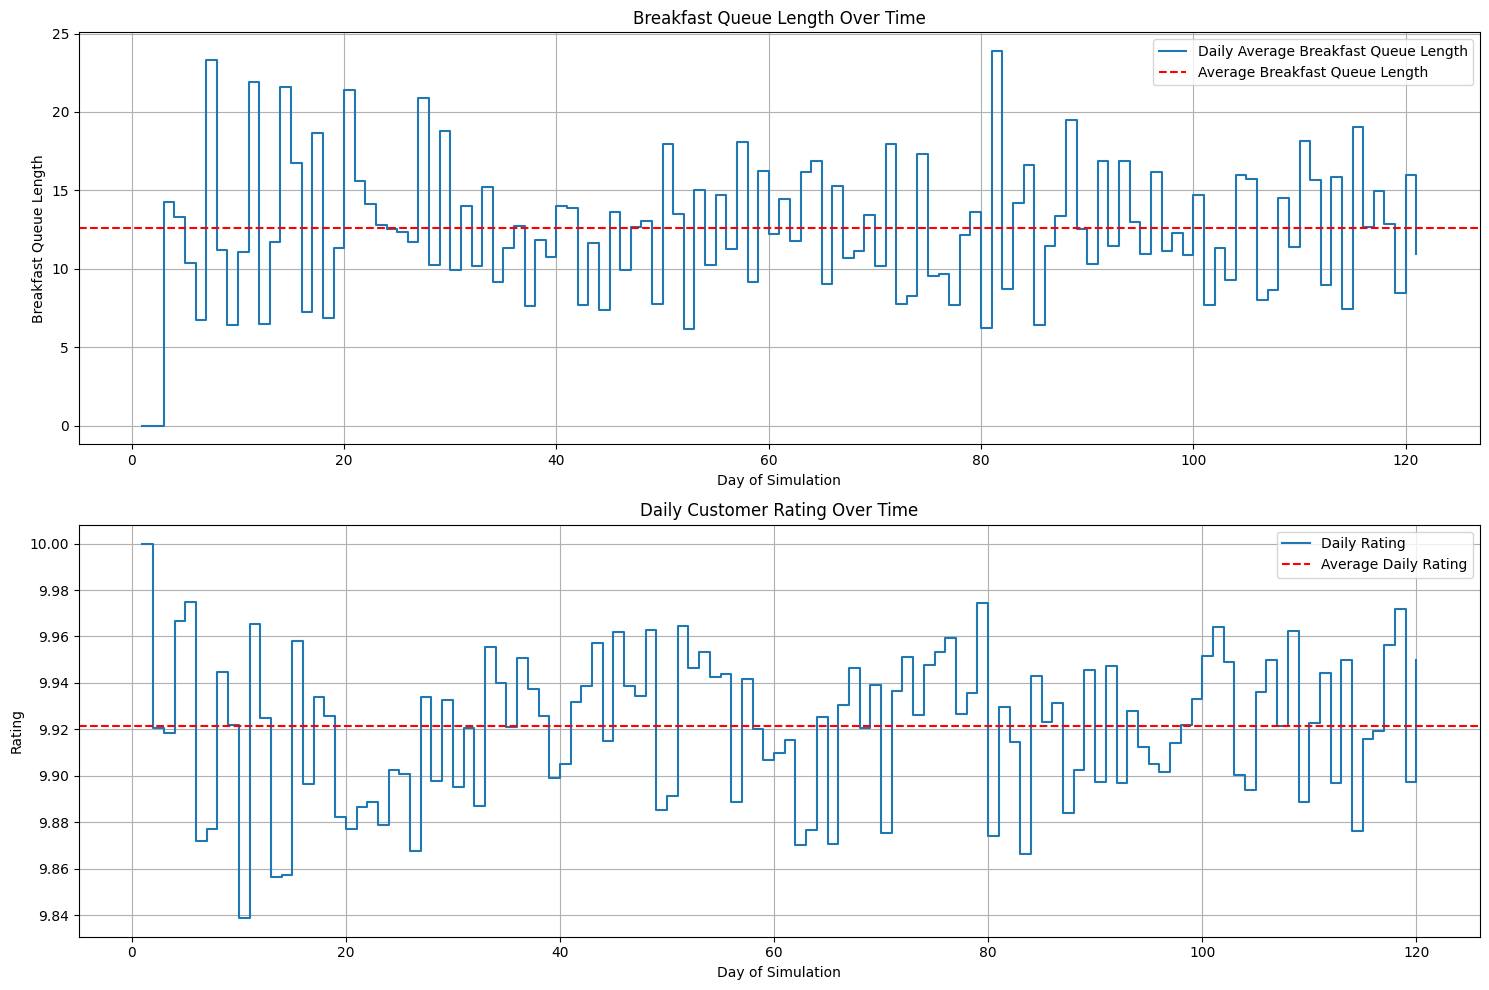

In [ ]:
sim.calculate_statistics()
sim.plot_metrics()

# Alternative Review

<div dir="rtl" align="right">

<strong>בדיקת חלופות:</strong>  
נבדוק קונבנציה שמורכבת מחלופה אחת :

1. <u>שידרוג צוות המטבח עבור שיפור איכות ארוחת הבוקר</u>  
&nbsp;&nbsp;&nbsp;&nbsp;<strong>עלות:</strong> 200,000$   
&nbsp;&nbsp;&nbsp;&nbsp;<strong>פרטים:</strong> העסקת שף מקצועי נוסף ושני טבחים. הקטנת הסיכוי לארוחת בוקר לא טובה : מ-10% ל- 3%.  
</div>

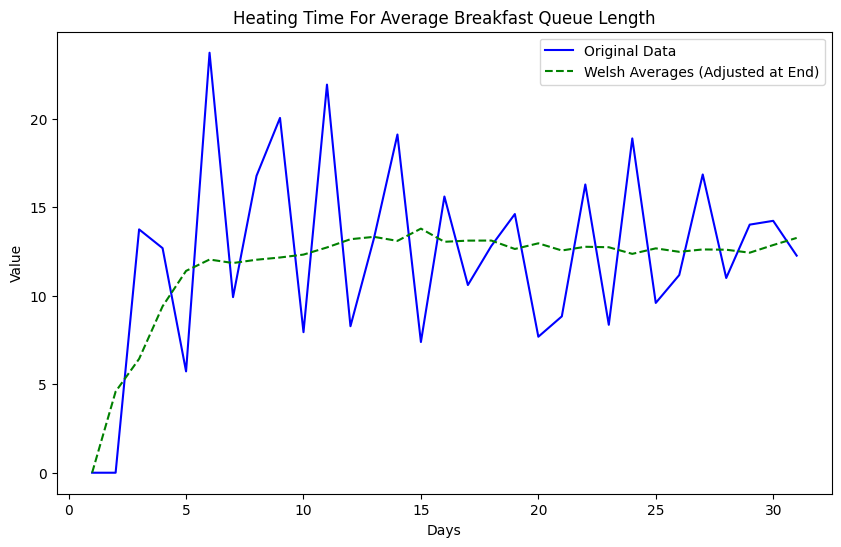

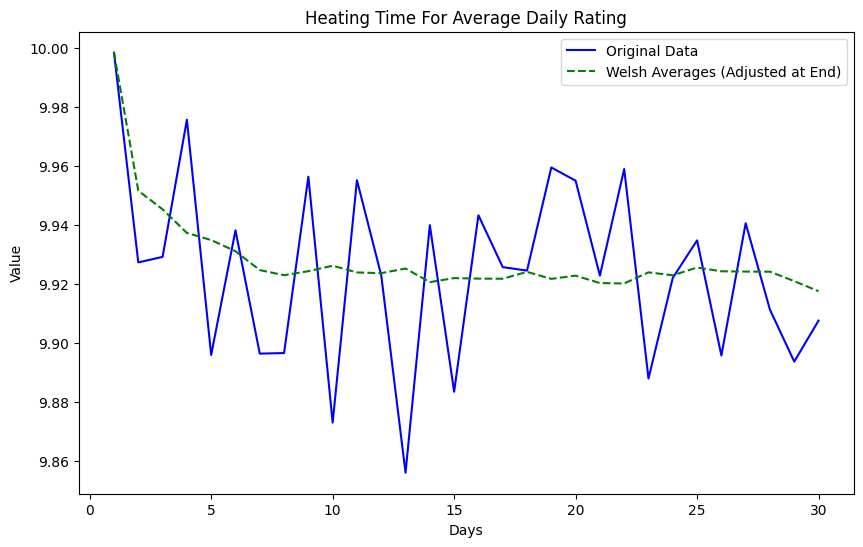

In [ ]:
alternative_sim = Simulation(30,0.03)
alternative_sim.run()

alternative_sim.plot_heating_time_data(alternative_sim.queue_breakfast.daily_avg_queue_lengths, 'Average Breakfast Queue Length')
alternative_sim.plot_heating_time_data(alternative_sim.hotel.daily_ratings, 'Average Daily Rating')

<div dir="rtl" align="right">

מאותם שיקולים למציאת זמן חימום המתוארים למעלה, זמן הרצת הסימולציה יהיה 120 ימים כולל 15 ימי החימום

</div>

In [ ]:
# List to store all results
results = []

# Running 20 simulations
for _ in range(20):
    sim_alt = Simulation(120,0.03)
    sim_alt.run()

    # Calculating results for each simulation
    avg_queue_lengths, avg_rating = sim_alt.calculate_statistics()

    # Adding the result to the list
    results.append({
        'avg_queue_lengths': avg_queue_lengths,
        'avg_rating': avg_rating
    })

# Creating a results table
df_results = pd.DataFrame(results)
df_results.index = range(1, 21)

# Calculating averages and standard deviations
average_values = df_results.mean()
std_values = df_results.std()

# Add average and standard deviation rows
df_results.loc['Average'] = average_values
df_results.loc['Standard Deviation'] = std_values

# Extracting mean and std values into variables
avg_queue_mean_alt1 = average_values['avg_queue_lengths']
avg_queue_std_alt1 = std_values['avg_queue_lengths']
avg_rating_mean_alt1 = average_values['avg_rating']
avg_rating_std_alt1 = std_values['avg_rating']

# Displaying the results
print(df_results)

                    avg_queue_lengths  avg_rating
1                           12.517843    9.927785
2                           12.915571    9.922726
3                           12.768762    9.927226
4                           12.714872    9.926125
5                           12.785820    9.925816
6                           12.531784    9.926956
7                           12.663879    9.931865
8                           12.748374    9.927706
9                           12.889381    9.927165
10                          12.643270    9.930695
11                          12.571397    9.927458
12                          13.047163    9.923303
13                          12.858583    9.926173
14                          12.431567    9.930092
15                          12.792850    9.925973
16                          12.667963    9.927946
17                          12.901538    9.922255
18                          12.661817    9.927848
19                          12.854248    9.924944


In [ ]:
# Calculating confidence interval for the average queue length for breakfast
lower_alt1_length, upper_alt1_length = confidence_interval(avg_queue_mean_alt1, avg_queue_std_alt1, 20, 0.05)
print(f"Confidence Interval for average queue length for breakfast: [{lower_alt1_length:.4f}, {upper_alt1_length:.4f}]")

# Calculating confidence interval for the average rating
lower_alt1_rating, upper_alt1_rating = confidence_interval(avg_rating_mean_alt1, avg_rating_std_alt1, 20, 0.05)
print(f"Confidence Interval for average rating: [{lower_alt1_rating:.4f}, {upper_alt1_rating:.4f}]")


Confidence Interval for average queue length for breakfast: [12.6640, 12.8080]
Confidence Interval for average rating: [9.9258, 9.9281]


In [ ]:
from scipy.stats import t
import math

from scipy.stats import t
import math
def relative_accuracy(mean, std, gamma, alpha, n):
    t_value = t.ppf(1 - alpha / 2, df=n - 1)
    delta = t_value * std / math.sqrt(n)
    relative_error = delta / mean
    threshold = gamma / (1 + gamma)
    meets_criterion = relative_error <= threshold
    return relative_error, threshold, meets_criterion

gamma = 0.1
alpha = 0.05
n = 20


metrics = ["Average Queue", "Average Rating"]
means = [avg_queue_mean_basic, avg_rating_mean_basic]
stds = [avg_queue_std_basic, avg_rating_std_basic]

results = []
for metric, mean, std in zip(metrics, means, stds):
    relative_error, threshold, meets_criterion = relative_accuracy(mean, std, gamma, alpha, n)
    results.append([metric, relative_error, threshold, meets_criterion])

# Creating table
df = pd.DataFrame(results, columns=[" ", "Relative Error", "Threshold γ/(1+γ)", "Meets Criterion"])
print(df.to_string(index=False))




                Relative Error  Threshold γ/(1+γ)  Meets Criterion
 Average Queue        0.008536           0.090909             True
Average Rating        0.000125           0.090909             True


Daily Ratings: [9.997600000000002, 9.848683908045984, 9.83166666666667, 9.966111842105263, 9.918236842105268, 9.940641791044776, 9.970263736263735, 9.889722972972981, 9.928245901639347, 9.963105978260872, 9.852513698630142, 9.91043650793651, 9.96197263681592, 9.954211956521739, 9.909245901639345, 9.964884146341461, 9.913848393574309, 9.867276515151516, 9.942621951219513, 9.912703703703716, 9.895451612903228, 9.957493975903617, 9.893379107981232, 9.94724647887324, 9.930885714285715, 9.9372905982906, 9.921866666666668, 9.943158730158732, 9.962080128205129, 9.936800000000002, 9.953167840375588, 9.93977136752137, 9.9316835443038, 9.928088308457715, 9.951900749063674, 9.891613526570056, 9.944295138888888, 9.953192488262914, 9.952265700483093, 9.944172284644198, 9.86748067632851, 9.950161666666666, 9.98175740740741, 9.87149324324325, 9.903633333333335, 9.956791208791211, 9.906685714285722, 9.949040000000002, 9.919944063926943, 9.918509615384618, 9.949908450704227, 9.938448717948718, 9.906937

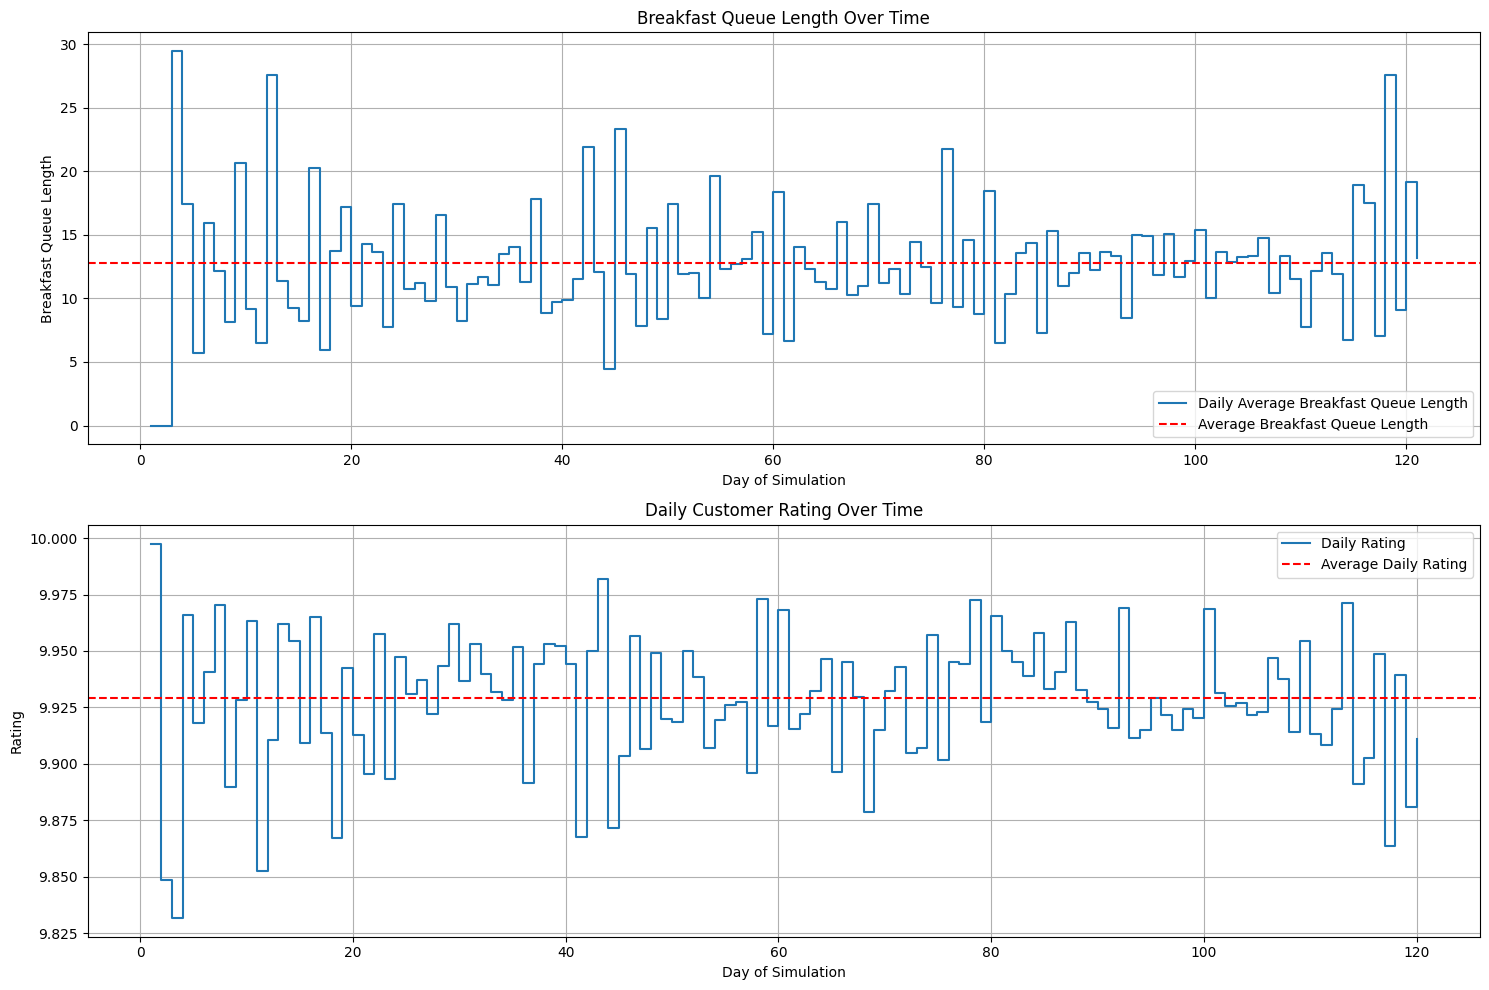

In [ ]:
sim_alt.calculate_statistics()
sim_alt.plot_metrics()

# Comparison of Alternatives By Welch

<div dir="rtl" align="right">

$$
\text{נבצע כעת השוואה בין החלופות באמצעות שיטת וולש, תוך הסתמכות על ההנחות הבאות}
$$

$$
 \text{אין תלות בין ריצות סימולציה שמבוצעות במקביל}\bullet \ \\
 \text{אין תלות בין הריצות השונות בכל חלופה בנפרד}\bullet \ \\
 \text{לא ניתן להניח כי השונויות בין החלופות זהות}\bullet \ \\
 \text{המדדים שנבדקים מתפלגים נורמלית}\bullet \
$$


הנחת הנורמליות מתאפרת מכיוון שמדובר במדדים שהינם ממוצעים כך שניתן להניח נורמליות. בנוסף, אין תלות בין הריצות השונות עבור החלופות מכיוון שהשתמשנו בrandom.random ולאחר בירור הבנו כי המידול האקראי נוצר בעזרת seed אקראי


</div>

In [ ]:
# Function to compare two alternatives using Welch's t-test
def welch_two_sample_ci(mean1, std1, n1, mean2, std2, n2, alpha=0.05, metric_name=""):
    # Difference in means
    diff = mean1 - mean2

    # Standard error of the difference
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Degrees of freedom using Welch–Satterthwaite equation
    numerator = (std1**2 / n1 + std2**2 / n2)**2
    denominator = ((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1))
    df = numerator / denominator

    # Critical t-value
    t_crit = t.ppf(1 - alpha / 2, df)

    # Confidence interval
    margin_of_error = t_crit * se_diff
    ci_lower = diff - margin_of_error
    ci_upper = diff + margin_of_error

    # Output results
    print(f"--- {metric_name} ---")
    print(f"Mean difference: {diff:.4f}")
    print(f"{100*(1-alpha):.0f}% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

    # Conclusion
    if ci_lower > 0:
        print(" The first alternative has a significantly higher mean.\n")
    elif ci_upper < 0:
        print(" The second alternative has a significantly higher mean.\n")
    else:
        print("No significant difference between the alternatives.\n")

# ----- Run comparisons -----

# Compare average queue length for breakfast between basic system and alternative 1
welch_two_sample_ci(
    mean1=avg_queue_mean_basic,
    std1=avg_queue_std_basic,
    n1=20,
    mean2=avg_queue_mean_alt1,
    std2=avg_queue_std_alt1,
    n2=20,
    alpha=0.05,
    metric_name="Average Queue Length for Breakfast"
)

# Compare average rating between basic system and alternative 1
welch_two_sample_ci(
    mean1=avg_rating_mean_basic,
    std1=avg_rating_std_basic,
    n1=20,
    mean2=avg_rating_mean_alt1,
    std2=avg_rating_std_alt1,
    n2=20,
    alpha=0.05,
    metric_name="Average Rating"
)


--- Average Queue Length for Breakfast ---
Mean difference: -0.0371
95% Confidence Interval: [-0.1636, 0.0894]
No significant difference between the alternatives.

--- Average Rating ---
Mean difference: -0.0029
95% Confidence Interval: [-0.0046, -0.0013]
 The second alternative has a significantly higher mean.



<div dir="rtl" style="text-align: right;">

<h3><strong>בפלט שהתקבל, נראה שיש הבדל בתוצאה של כל אחת מההשוואות:</strong></h3>

<strong>אורך תור ממוצע לארוחת בוקר:</strong><br>
נשים לב כי עבור רמת המובהקות המבוקשת, הערך 0 נמצא בתוך רווח הסמך שהתקבל ולכן לא נוכל לקבוע ברמת מובהקות זו איזה אלטרנטיבה עדיפה (מצב קיים או שידרוג צוות המטבח)<br><br>

<strong>דירוג ממוצע:</strong><br>
נשים לב כי כלל רווח הסמך נמצא בטווח השלילי, כלומר קטן מאפס כך שנוכל לקבוע כי עבור מובהקות של 0.9 נאמר כי האלטרנטיבה של שיפור צוות עובדי המטבח עדיפה בהקשר של מדד רייטינג המלון

</div>

<div dir="rtl" style="text-align: right;">

<h3><strong>ניתוח הפרויקט - מסקנות והמלצות</strong></h3>

הפרויקט מדמה בעזרת סימולציה בתכנות אירועים את ההתנהלות היומיומית של בית מלון, שימוש של אורחי המלון במתקנים השונים שהמלון מציע, וכן מעקב ובקרה אחר מדדים שונים עבור הישגי המלון.

לאחר בדיקת אורכי תור ממוצעים עבור מספר תורים שונים שיש במלון, מצאנו כי **התור לארוחת הבוקר מהווה צוואר בקבוק**. בנוסף, רצינו לעקוב אחר **דירוג המלון**, מכיוון שהוא מהווה חלק מהותי בקביעת קצב הגעת האורחים למלון.

בעקבות ניתוח מדדים אלו, בחנו את האפשרות ל**שיפור צוות עובדי המטבח**, ובכך להקטין את הורדת הדירוג האפשרית בעקבות ארוחה לא טעימה.

נמצא כי מבחינה סטטיסטית **שיפור צוות עובדי המטבח משפר את רייטינג המלון**, אך עבור מדד **התור לארוחת הבוקר** לא ניתן לקבוע האם ישנו שיפור או דווקא החמרה.

נדגיש כי **שיפור הרייטינג משפיע באופן ישיר על קצב הגעת האורחים**, ולכן היה חשש שישפיע לרעה על מדד אורך התור הממוצע – מה שדרש ניטור מדד זה במקביל לבחינת השפעת החלופה על הדירוג.

---

לסיכום:  
למרות שמבחינה סטטיסטית נקבע כי **"המערכת החדשה" עם שיפור עובדי המטבח עדיפה מבחינת מדד הרייטינג**, מבחינה לוגית **נמליץ דווקא לא להשקיע בחלופה זו**.

עלות השדרוג היא כ־200,000 דולר, והשינוי במדד הרייטינג נמצא כ**מינורי**, מאחר שדירוג נמוך על ארוחת בוקר איננו מהווה גורם מהותי בפגיעה בדירוג הכולל של המלון.

לפיכך, אנו מציעים לבדוק **אפיקי השקעה חלופיים**, ולאו דווקא להתמקד בשיפור צוות המטבח.

</div>
